# Site Analytics Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Site Analytics in 2023 is 105642.8920 dollars. It is profitable, with total net profit at 12872.0032. This put Site Analytics's profit margin at 12.18%.
>* From January to June, revenue growth had been negative. Growth starts to pick up in July, and by December the CMGR is around 2% growth. On average, CMGR is around 0.3%.
>* On average, Site Analytics have around 64 users each month, with 21 being active. There is a 79.5% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* For most cohort, general active user in the initial month range from 5-8 users. First three cohort (January, February, and March cohort) have higher initial users than other cohorts (15, 13, 19 active users, respectively). After their initial purchase, most cohort's retention rates generally would fall below 40% in their lifetime.
>* In net revenue, January, February, and March cohort showed significant upwards trend. Each contributes a significant sum by December (17k, 16k, 20k; respectively).
>* Revenue on a per-user basis is relatively high for Site Analytics, with most cohort having per-user revenue above 800 by December.
>* Generally NDR rates are below 80%, with some exceptions. February, May, and June cohorts had periods where NDR reached above 100%.. 
>* In CLV, April cohort has had a relatively more active per user purchases above 125 dollars, with its highest profit at 151.19 in July.
>* No negative per-user profit values can be observed for Site Analytics. 
>
>Profitability
>* Before discounts, positive profits are consistently present, while negative profits are very minimal. 
>* Highest positive profit can be is in September (4209.76), November (4607.83), and December (2908.07). High profits at the these periods might indicate year-end activities, holiday season demand, and businesses utilizing remaining budgets.
>* Earlier in the year, February, March, and April show lower positive profits compared to other months (835.91, 1418.73, 1022.99; respectively). For many businesses, the post-holiday period often sees a slowdown in spending.
>* Mid-year, Site Analytics show steady increase in positive profits, peaking in August (2668.91). 
>
>Discounting EDA
>* Majority of Site Analytics orders (68%) are discounted, primarily at 20% (~55%) and 40% (~13%), highlighting reliance on discounts to drive sales.
>* After discounts, Site Analytics consistently maintains positive profits, though reduced by around 50%, indicating customers' preference for discounted prices.
>* September, November, and December remain the most profitable months after discounts due to year-end activities, with overall profits of 1525.9823, 2428.0029, and 1853.6581, respectively.
>* Despite being the least profitable months, February, March, and April still have overall positive profits after discounts, demonstrating resilience.
>* In later months (August, September, December), high variability in the no discount range indicates inconsistent performance without discounts.
>* Consistent negative statistics in the 40% discount range suggest this discount may be too steep, while optimizing discount strategies can minimize losses in certain months.
>
>Ideal Customer Profile (ICP) EDA
>* For the Site Analytics product, prioritize the SMB segment, which leads in Total Accounts (47.14%), Net Revenue (48.83%), Total Quantity (49.50%), and Total Sales (49.06%), with the highest Net Profit Before Discount (14,537.37) and a substantial Net Profit (6,478.10). Maintain the performance of both the Strategic segment (Total Accounts: 30.00%, Net Revenue: 24.77%, Net Profit: 2,672.05) and the Enterprise segment (Net Profit Before Discount: 7,166.32, Net Profit: 3,721.86).
>* In the SMB segment, top-performing industries include Communications in EMEA, Tech in AMER, and Consumer Products in APJ. While AMER’s Healthcare, Manufacturing, and Transportation contribute to losses, the total gains far exceed these losses, indicating strong overall financial performance. It's important to address inefficiencies and cost structures to maintain profitability.
>* For the Strategic segment, notable gains are seen in EMEA's Finance and Consumer Products, and APJ's Manufacturing. However, significant losses are incurred in EMEA's Tech and Manufacturing, as well as AMER's Tech and Healthcare. Despite this, the segment's overall positive financial performance highlights the importance of strategic adjustments to manage high discounts and boost profitability.
>* In the Enterprise segment, EMEA's Finance and APJ's Energy and Manufacturing show strong gains. Losses are mainly from Communications in AMER and Tech in EMEA, with additional smaller losses in Finance, Misc, and Consumer Products. The segment’s gains outweigh losses, but addressing the reasons behind these losses is key for sustained profitability.
>* EMEA leads in sales and net profits, excelling especially in the latter part of the year with peaks in May, June, August, September, and November. Despite discounts, EMEA maintains positive net profits year-round, showcasing stability and resilience. It consistently demonstrates the highest overall performance in sales and net profits.
>* AMER shows strong peaks in January, July, September, and December, but discounts heavily impact net profits, especially in March and July, often turning positives negative. 
>* APJ has lower sales and net profits compared to EMEA and AMER, with significant fluctuations. Despite peaks, discounts heavily impact net profits, often turning them negative.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [61]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [62]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [63]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [64]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [65]:
#slice main df by product first
prod3 = df.query("Product == 'Site Analytics'")
# then slice product df by year of analysis
prod3_2023=prod3.query('year == 2023')

----

### General Performance Report

In [66]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod3_2023['reg_date'] = prod3_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_4088\2995683100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod3_2023['reg_date'] = prod3_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [67]:
# make a user df, from the product df
prod3_2023_user = prod3_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [68]:
# from user df, extract month datetime data, from date of first purchase
prod3_2023_user['reg_month']= prod3_2023_user['reg_date'].values.astype('datetime64[M]')

In [69]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod3_2023_user['key'] = 1
prod3_2023_user = template_table.merge(prod3_2023_user,on='key')
prod3_2023_user =prod3_2023_user.drop('key',axis=1)

In [70]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod3_2023_user = prod3_2023_user[prod3_2023_user['Month']>=prod3_2023_user['reg_month']]

In [71]:
prod3_2023['Month'] = prod3_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod3_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod3_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod3_2023_user = prod3_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod3_2023_user = prod3_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_4088\14157909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod3_2023['Month'] = prod3_2023['Order Date'].values.astype('datetime64[M]')


In [72]:
prod3_2023_user['user'] = 1    
prod3_2023_user['new user'] = (prod3_2023_user['reg_month'] == prod3_2023_user['Month']) * 1 
prod3_2023_user['active'] = (prod3_2023_user['Sales'] > 0) * 1   
prod3_2023_user['active_prev'] = (prod3_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod3_2023_user['change_status'] = (prod3_2023_user['active'] != prod3_2023_user['active_prev']) * 1
prod3_2023_user['session_id'] = (prod3_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod3_2023_user['inactive'] = (prod3_2023_user['active'] == 0) * 1
prod3_2023_user['month_inactive'] = (prod3_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [73]:
#Site Analytics monthly user report (2023)
prod3_2023_report = prod3_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod3_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,56.0000,16.0000,7802.9140,6838.3468,2246.0353,1281.4681,15,15,15
2023-02-01,52.0000,15.0000,3349.8700,2710.7052,835.9052,196.7404,28,13,14
2023-03-01,87.0000,23.0000,5979.3620,4769.2940,1418.3036,208.2356,47,19,22
2023-04-01,42.0000,10.0000,3648.0660,3212.9164,1022.0889,586.9393,52,5,10
2023-05-01,76.0000,21.0000,6790.2160,5808.5648,1806.5567,824.9055,60,8,19
2023-06-01,85.0000,20.0000,7341.7220,5969.4492,2323.9192,951.6464,66,6,19
2023-07-01,96.0000,23.0000,9828.1360,7756.4224,2652.1487,580.4351,74,8,20
2023-08-01,76.0000,18.0000,9670.5280,8212.3712,2668.9066,1210.7498,79,5,16
2023-09-01,124.0000,34.0000,16008.2440,13327.4600,4206.7663,1525.9823,84,5,27


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [74]:
prod3_2023_churn = prod3_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod3_2023_churn['old active'] = (prod3_2023_churn['active'] - prod3_2023_churn['new user'])
prod3_2023_churn['user churn'] = ((1 - (prod3_2023_churn['old active'] / prod3_2023_churn['user'].shift(1))) * 100).round()
prod3_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,7802.9140,1281.4681,15,15,15,0,NaN
2023-02-01,3349.8700,196.7404,28,13,14,1,93.0000
2023-03-01,5979.3620,208.2356,47,19,22,3,89.0000
2023-04-01,3648.0660,586.9393,52,5,10,5,89.0000
2023-05-01,6790.2160,824.9055,60,8,19,11,79.0000
2023-06-01,7341.7220,951.6464,66,6,19,13,78.0000
2023-07-01,9828.1360,580.4351,74,8,20,12,82.0000
2023-08-01,9670.5280,1210.7498,79,5,16,11,85.0000
2023-09-01,16008.2440,1525.9823,84,5,27,22,72.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [76]:
#monthly avg. user churn
prod3_2023_churn[["user", "active", "user churn"]].mean()

user         64.4167
active       20.8333
user churn   79.4545
dtype: float64

In [79]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod3_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 7802.9140, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

sales_report

,month,Sales,net_profit,CMGR
0,1,7802.9140,1281.4681,0.0000
1,2,3349.8700,196.7404,-57.0690
2,3,5979.3620,208.2356,-12.4615
3,4,3648.0660,586.9393,-22.3869
4,5,6790.2160,824.9055,-3.4157
5,6,7341.7220,951.6464,-1.2111
6,7,9828.1360,580.4351,3.9208
7,8,9670.5280,1210.7498,3.1130
8,9,16008.2440,1525.9823,9.3984
9,10,8240.8700,1223.2397,0.6086


In [80]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-2.303847675934588

In [81]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

0.30430375208001514

In [82]:
prod3_2023[['Sales', 'net_profit']].sum()

Sales        105642.8920
net_profit    12872.0032
dtype: float64

In [83]:
# Total monthly profit margin
(12872.0032/ 105642.8920) * 100

12.184447960777142

In [84]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.8155
net_profit,0.8155,1.0000


**Key findings:**
1. On average, Site Analytics have around 64 users each month, with 21 being active. There is a 79.5% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year (32 accounts and 118 units purchased in December), but number of new users decrease (only 1 new user in December).
2. From January to June, revenue growth had been negative. Growth starts to pick up in July, and by December the CMGR is around 2% growth. On average, CMGR is around 0.3%.
3. Total revenue for Site Analytics in 2023 is 105642.8920 dollars. It is profitable, with total net profit at 12872.0032. This put Contactmatcher's profit margin at 12.18%.

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod3_2023_user['date']=prod3_2023_user['Month'].dt.to_period('M')
prod3_2023_user['cohort']= prod3_2023_user['reg_month'].dt.to_period('M')
prod3_2023_user['lifetime'] = (prod3_2023_user['date'] - prod3_2023_user['cohort']).apply(attrgetter('n'))

In [17]:
prod3_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1006,Aviva,2023-01-31,2023-01-01,3.0000,207.0000,207.0000,51.7500,51.7500,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1007,AmerisourceBergen,2023-01-20,2023-01-01,5.0000,590.3760,386.3808,120.9637,-83.0315,2.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod3_cohort = prod3_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod3_cohort ['active rate'] = (prod3_cohort['active'] / prod3_cohort['user']) * 100
prod3_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,15,15,15,100.0000
1,2023-01-01,1,15,0,1,6.6667
2,2023-01-01,2,15,0,2,13.3333
3,2023-01-01,3,15,0,2,13.3333
4,2023-01-01,4,15,0,4,26.6667
...,...,...,...,...,...,...
73,2023-10-01,1,3,0,0,0.0000
74,2023-10-01,2,3,0,0,0.0000
75,2023-11-01,0,3,3,3,100.0000
76,2023-11-01,1,3,0,0,0.0000


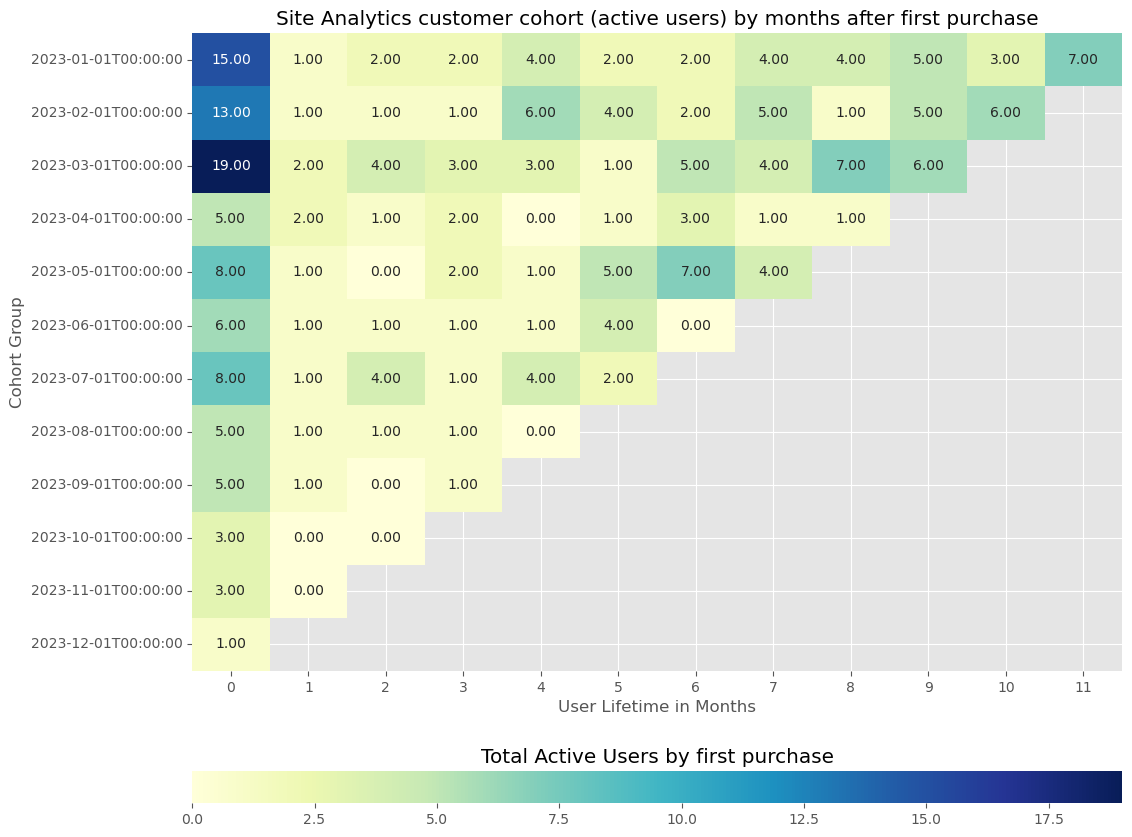

In [19]:
# customer cohort
pivot0 =prod3_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Initial active users in the first three cohort, the January, February, and March cohort, is generally higher than the  initial users in other cohorts (15, 13, 19 active users, respectively). 


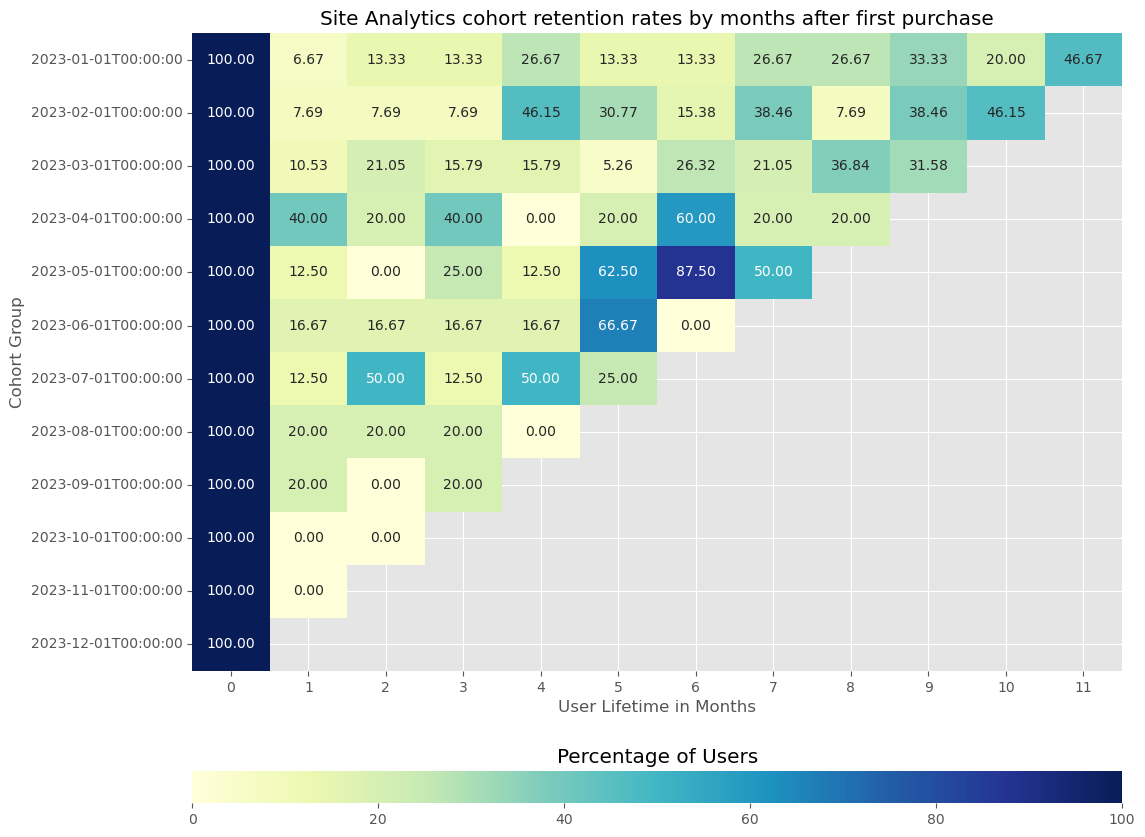

In [20]:
# customer retention
pivot1 =prod3_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- In terms of retention rate, May cohort is significant where starting from October its retention rate would reach above 50%, peaking in November at 87.5%.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

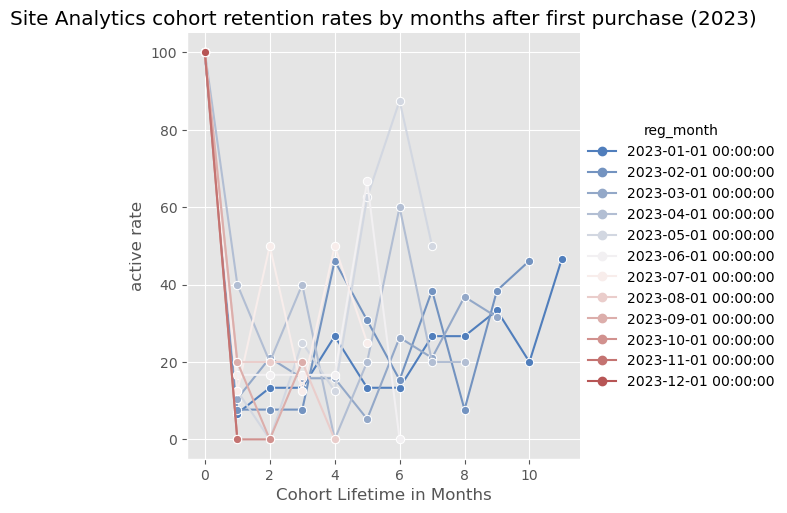

In [21]:
# retention rate lineplots
sns.relplot(data=prod3_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Site Analytics cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- After their initial purchase, most cohort's retention rates generally would fall below 40% in their lifetime.

In [17]:
prod3_cohort2 =prod3_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

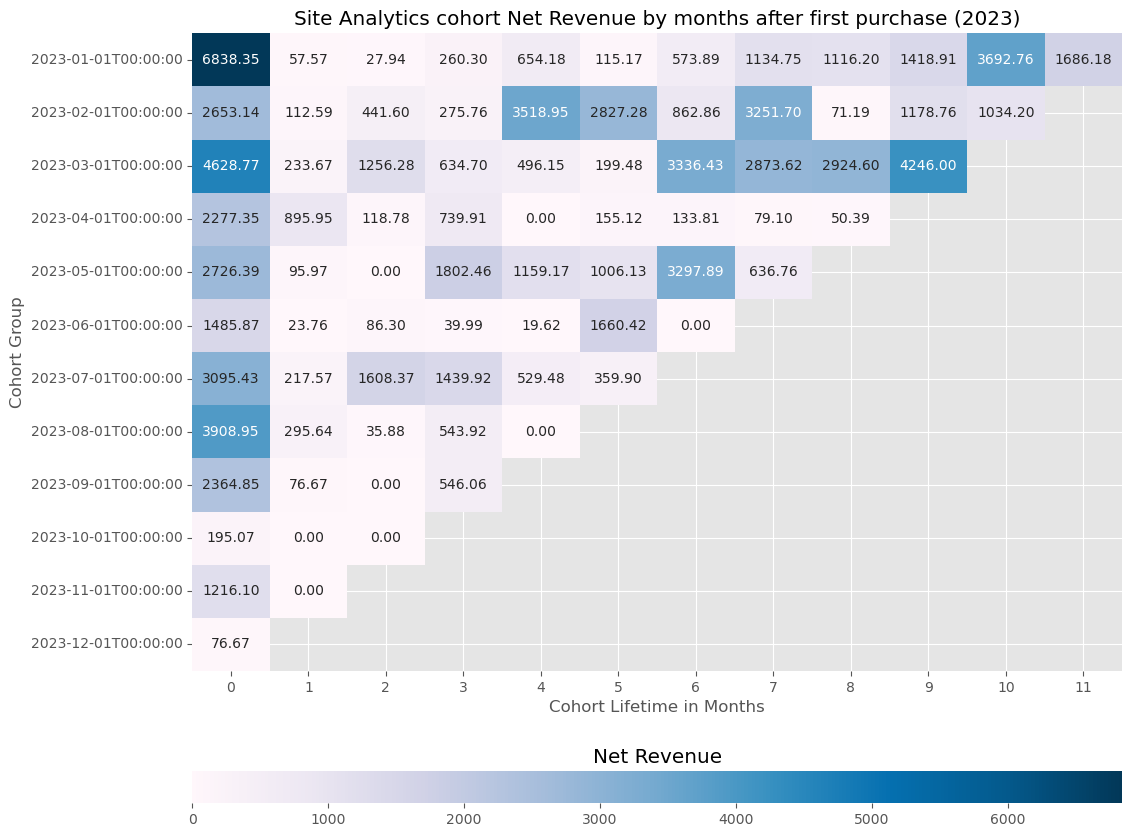

In [23]:
# Net Revenue by Cohort
pivot2 =prod3_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- January is the cohort with the highest initial purchase, at 6838.35.
- Generally, during the first 3 months of a cohort's lifetime (after the initial purchase), number of purchases never reach above 2K. At 4 months in their lifetime onwards, some earlier cohorts made significant subsequent purchases (March and February cohort being notable).

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod3_2023_user.loc[prod3_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod3_cohort2 = prod3_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod3_cohort2 ['net dollar retention'] = (prod3_cohort2['discounted_sales'] / prod3_cohort2['ds_max']) * 100

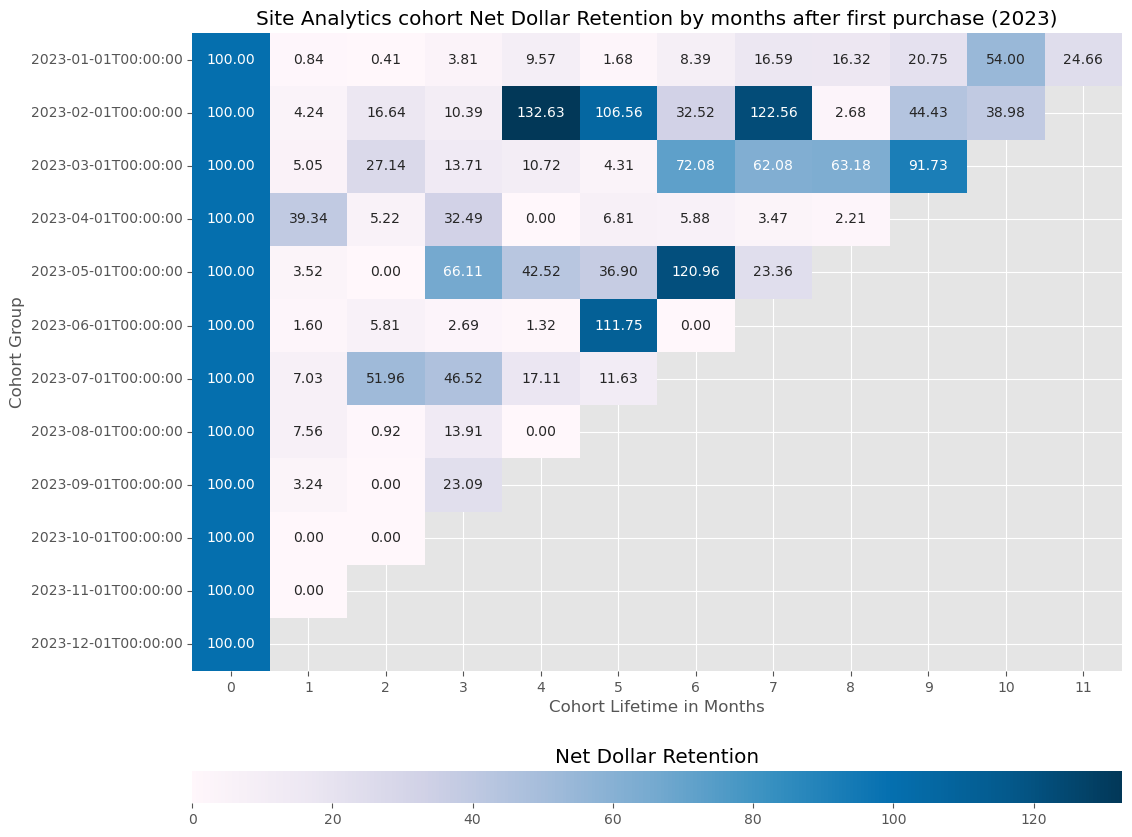

In [ ]:
# Net Dollar/Revenue Retention
pivot3 =prod3_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

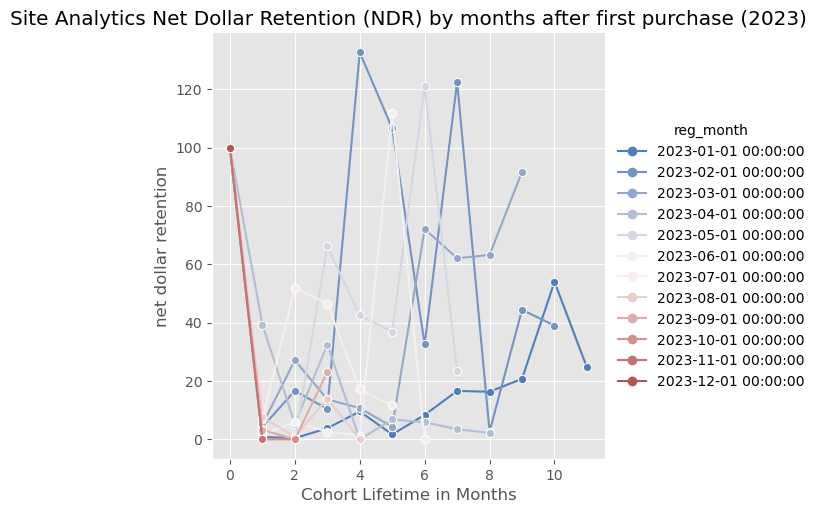

In [23]:
# some data are easier to read with a different chart- NDR lineplots
sns.relplot(data=prod3_cohort2 , x="lifetime", y="net dollar retention",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Site Analytics Net Dollar Retention (NDR) by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally NDR rates are below 80% for Site Analytics, with some rates at 0 % at certain months for cohorts.
- There are instances which NDR exceed 100%. February cohort has a series of purchases (in June, July, and September) where its purchase exceed 100% NDR (132.63%, 106.56%, and 122.56%, respectively). In November, the May and June cohorts each made a purchase which exceeds 100% NDR (120.96% and 111.75%, respectively); this number would drop drastically after.  

In [19]:
prod3_cohort2 ['cumulative lifetime revenue'] = prod3_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

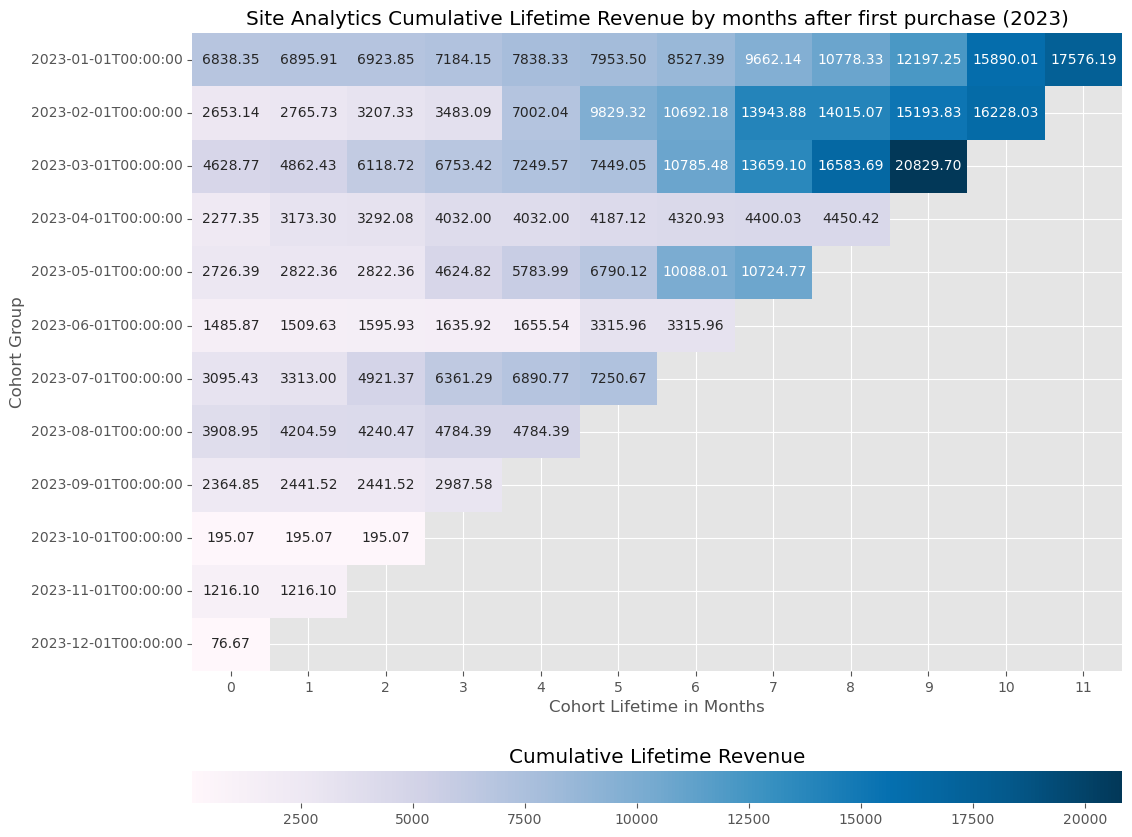

In [27]:
# cumulative lifetime revenue by cohort
pivot4 =prod3_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

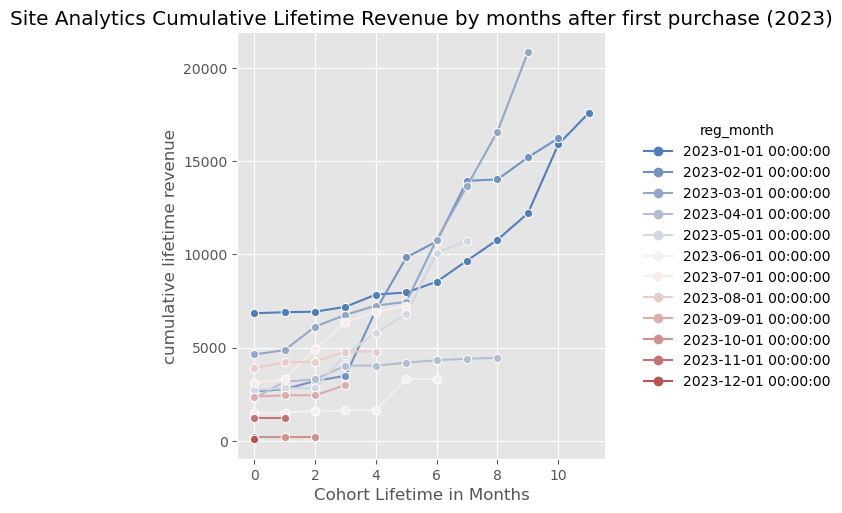

In [ ]:
# cumulative lifetime revenue lineplots
sns.relplot(data=prod3_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Site Analytics Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Though some cohorts are stagnant (mostly cohorts from later months), there are some with an upwards trend based on its cumulative revenue. This meant that some subsequent purchases are occurring. Most significant from the cohorts are cohorts from the first three months: January, February, and March cohorts.
- March cohort stands out because from August onwards it has been significant in subsequent purchases, generating over 20k by December.
- February cohort has been on the same trajectory as the March cohort, but in September its purchases have slowed, and it generated around 16k by December. 
- January cohort has had the highest initial purchase at around 6k, with purchases which steadily increases. In September the cohort follows the pace of the March cohort and generates around 17k by December.

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod3_2023_user.loc[prod3_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod3_cohort2 = prod3_cohort2.merge(user_max,how='left',on=['reg_month'])
prod3_cohort2 ['customer lifetime revenue'] = (prod3_cohort2['cumulative lifetime revenue'] / prod3_cohort2['user_max'])

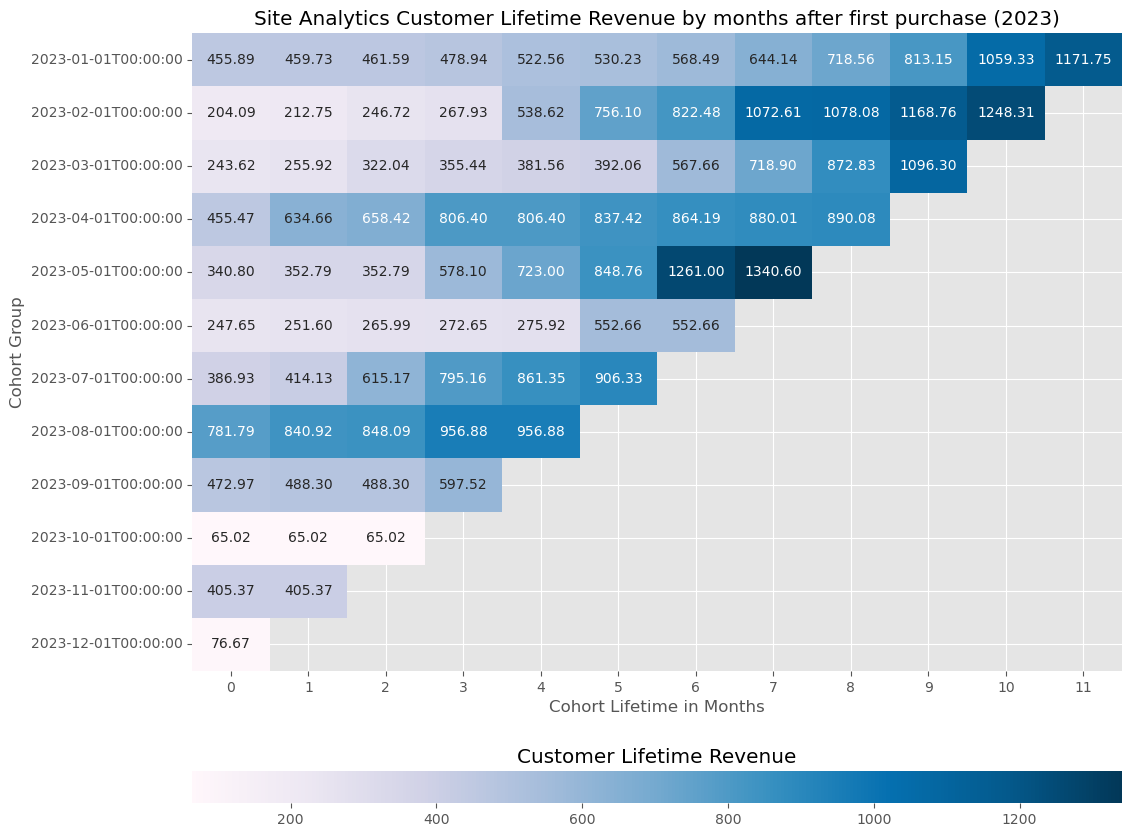

In [29]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod3_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

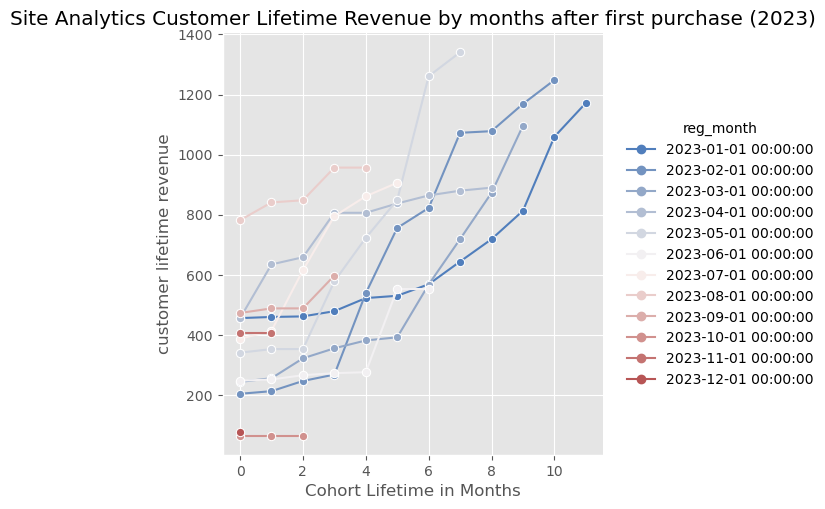

In [26]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod3_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Site Analytics Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- May cohort yield the highest per-user value, with each user in the cohort paying on average 1.3k by December.
- Second highest is the February cohort, within which each user by December would pay around 1.2k. 
- General per user value is relatively high for Site Analytics, with most having per-user value above 800 by December.

In [21]:
# CLV - but with net profit
prod3_cohort2 ['cum_net_profit'] = prod3_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod3_cohort2 ['Customer Lifetime Value'] = (prod3_cohort2['cum_net_profit'] / prod3_cohort2['user_max'])

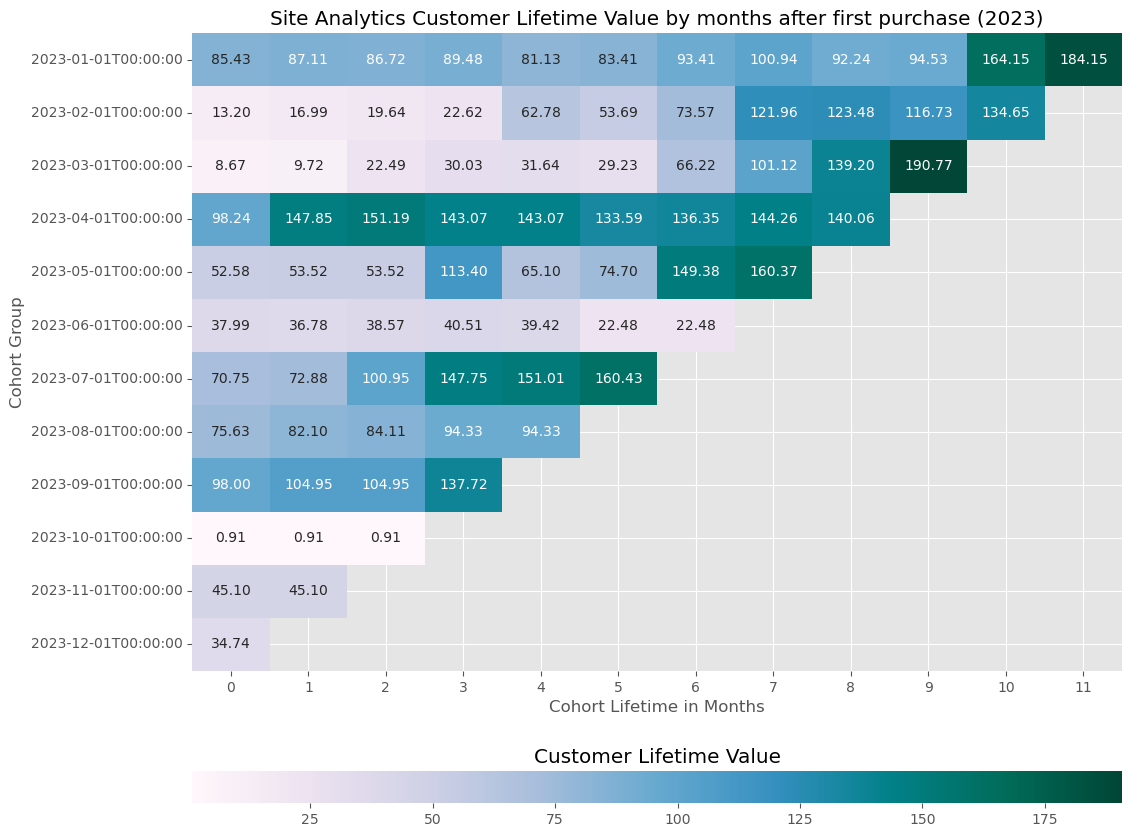

In [31]:
# Customer Lifetime Value, by cohort
pivot6 =prod3_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Site Analytics Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

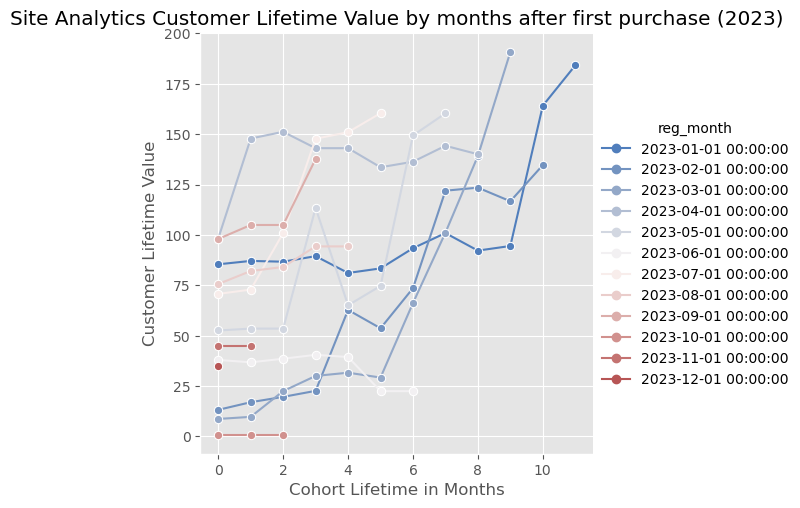

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod3_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Site Analytics Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are no negative profit values per user in the cohorts, meaning that Site Analytics is contributing to profit.
- Though March cohort provide the highest profits from all the cohorts per user (190.77), we can see that only in two months in its lifetime was per user values above 125 dollars. Instead, April cohort has had a relatively more active per user purchases above 125 dollars, with its highest profit at 151.19 in July. Based on the CLV, April cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of April cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. For most cohort, general active user in the initial month range from 5-8 users. First three cohort (January, February, and March cohort) have higher initial users than other cohorts (15, 13, 19 active users, respectively). 
2. After their initial purchase, most cohort's retention rates generally would fall below 40% in their lifetime.
3. In revenue, January, February, and March cohort showed significant upwards trend. Each contributes a significant sum by December (17k, 16k, 20k; respectively).
4. Generally NDR rates are below 80%, with some exceptions. February, May, and June cohorts had periods where NDR reached above 100%.
5. Revenue on a per-user basis is relatively high for Site Analytics, with most cohort having per-user revenue above 800 by December.
6. In CLV, April cohort has had a relatively more active per user purchases above 125 dollars, with its highest profit at 151.19 in July.
7. No negative per-user profit values can be observed for Site Analytics. 

### Profitability

In [21]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod3_2023[prod3_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod3_2023[prod3_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

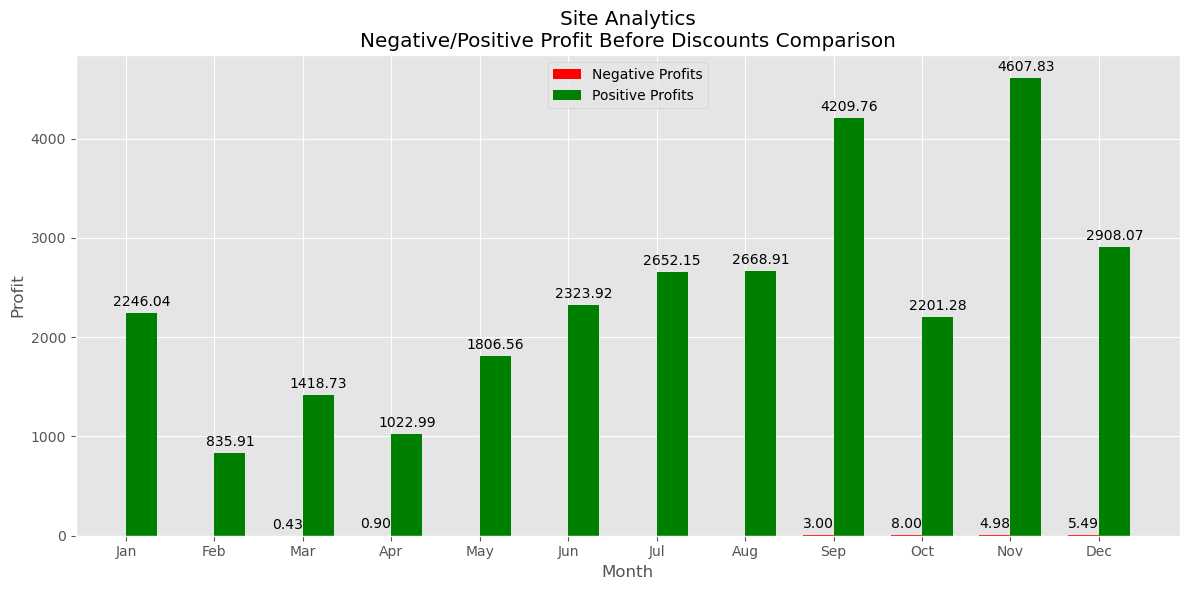

In [23]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Site Analytics\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Before discounts, positive profits are consistently present, while negative profits are very minimal. 
2. Highest positive profit can be is in September ($4209.76), November ($4607.83), and December ($2908.07). High profits at the these periods might indicate year-end activities, holiday season demand, and businesses utilizing remaining budgets.
3. Earlier in the year, February, March, and April show lower positive profits compared to other months (835.91, 1418.73, 1022.99; respectively). For many businesses, the post-holiday period often sees a slowdown in spending.
4. Mid-year, Site Analytics show steady increase in positive profits, peaking in August ($2668.91). 

### Discounting EDA

In [26]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod3_2023[(prod3_2023['net_profit'] < 0)]
post_discount_positives = prod3_2023[(prod3_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

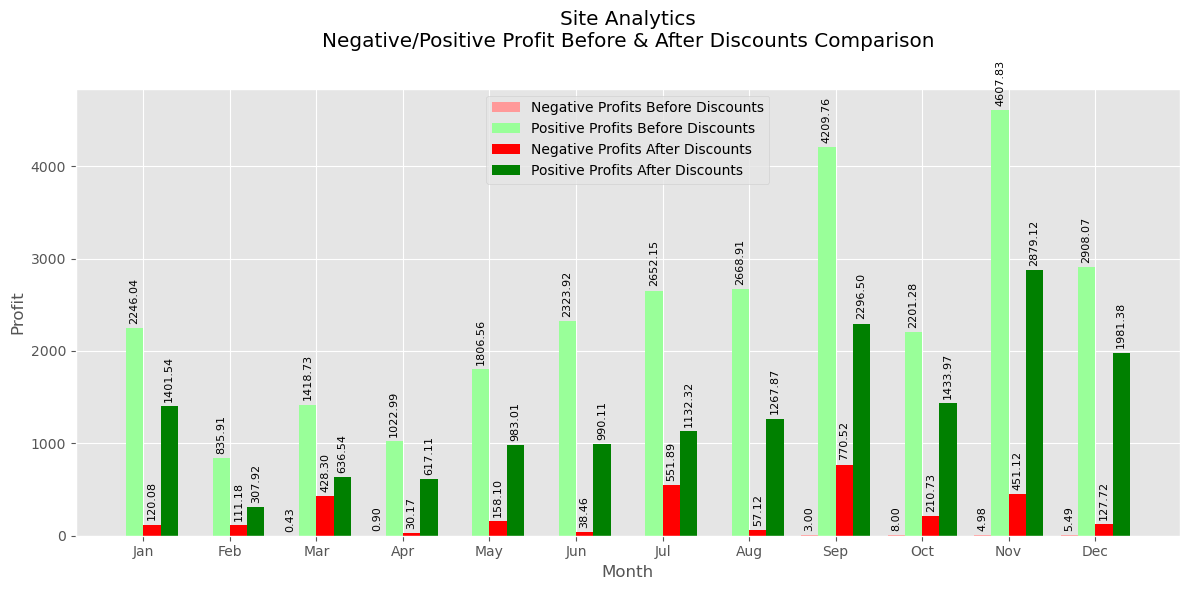

In [28]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Site Analytics\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

- After discounts, Site Analytics still consistently have positive profits. However positive profits are greatly reduced around 50% across all months. This suggest that discounting is needed to make sales, and that customers aren't willing to pay full price.
- Driven by year-end activities and spending, September, November, and December still remain the most profitable months after discounts. Overall profit for September is 1525.9823 (2296.5026 - 770.5203), for November is 2428.0029 (2879.1200 - 451.1171), and for December is 1853.6581 (1981.3763 - 127.7182).
- Despite being the least profitable months, February, March, and April still maintain overall positive profits after discounts. Overall profit for February is 196.7404 (307.9204 - 111.1800), for March is 208.2356 (636.5383 - 428.3027), and for April is 586.9393 (617.1100 - 30.1707).
- Most months maintain overall positive profits even after discounts, demonstrating the resilience of Site Analytics. However, discounting strategy might need optimizing to enhance profitability. 

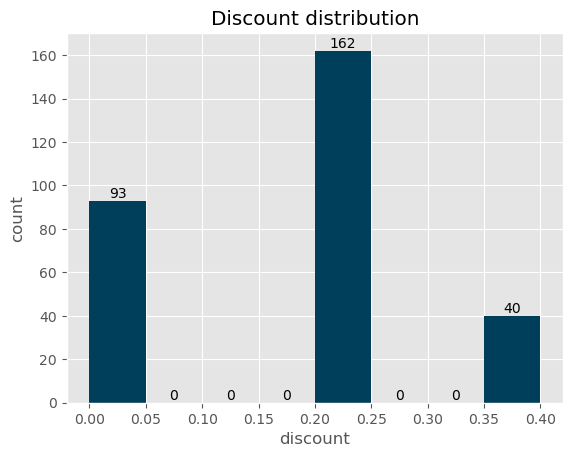

In [37]:
n, bins, patches = plt.hist(data=prod3_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Discount distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()


In [38]:
93 + 162 + 40

295

In [40]:
162+40

202

In [ ]:
# discounted orders percentage
202/295

0.6847457627118644

In [42]:
# 20% discount percentage
162/295

0.5491525423728814

- we can see that majority of Site Analytics orders are discounted orders (around 68%), with 162 orders being 20% discount orders (~55%), and 40 orders being 40% discount orders (~13%).

In [43]:
# Range of Discounts (February, April, August, September, December)
filtered_df = prod3_2023[prod3_2023['month'].isin([2, 4, 8, 9, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean       min    median      75%      max  count
month Discount                                                                
2     0.0000    33.5271   27.2550    7.3451    8.4564  37.2099  65.9634      3
      0.2000    39.7851   13.8488  -87.6672   19.1452  25.1441  66.7152     10
      0.4000     0.3360  -11.7564  -11.9940  -11.7564 -11.6376 -11.5188      2
4     0.0000    88.0743   86.1706   11.1294   33.3256 176.1708 188.1404      5
      0.2000    33.6484   36.1125   -5.6943   34.5000  47.9800  84.5982      5
      0.4000        NaN  -24.4764  -24.4764  -24.4764 -24.4764 -24.4764      1
8     0.0000   161.8287  184.3894   10.9939  174.1981 280.1556 378.1674      4
      0.2000    87.0834   40.7929    3.5960   13.4386  27.2952 327.5922     13
      0.4000        NaN  -57.1152  -57.1152  -57.1152 -57.1152 -57.1152      1
9     0.0000   120.0831  125.0366   11.5971  106.3494 128.3848 350.9082     14
      0.2000    28.4066   27.3159  -17.9910   19.1976  36.2872  88.4850     19
      0.4000   164.0469 -185.8832 -386.3916 -154.8723 -54.0823 -47.3968      4
12    0.0000   205.5872  119.7083    0.7794   35.6346 148.4910 743.9880     13
      0.2000    21.2246   16.1956  -16.5528   14.7582  30.4776  52.9173     17
      0.4000    53.0678    4.4250  -35.6174  -20.9970   9.4437  94.4937      5

- As orders increase in later monthly periods (here August, September, and December), within the no discount range variability increases, with significant differences in the minimum and maximum values. This suggests that while some orders at full price yield high profits, others do not, indicating inconsistent performance without discounts.
- Across several months, there is consistent negative statistics in the 40% discount range. This is indication that 40% discount might be too steep.
- With the exception of August, there are negative minimum values in 20% discount range. This indicate that 20% discounts often result in some orders being unprofitable. This is especially true in February, where the min value in the 20% discount range is -87.6672, while the max value is 66.7152, indicating significant profit loss. August’s positive min value suggests it might be a better month for applying this discount rate due to stronger demand or less price sensitivity.
- Optimizing or adjusting discount strategies is essential for Site Analytics to minimize significant losses during certain months.

**Key findings:**
1. Majority of Site Analytics orders (68%) are discounted, primarily at 20% (~55%) and 40% (~13%), highlighting reliance on discounts to drive sales.
2. After discounts, Site Analytics consistently maintains positive profits, though reduced by around 50%, indicating customers' preference for discounted prices.
3. September, November, and December remain the most profitable months after discounts due to year-end activities, with overall profits of 1525.9823, 2428.0029, and 1853.6581, respectively.
4. Despite being the least profitable months, February, March, and April still have overall positive profits after discounts, demonstrating resilience.
5. In later months (August, September, December), high variability in the no discount range indicates inconsistent performance without discounts.
6. Consistent negative statistics in the 40% discount range suggest this discount may be too steep, while optimizing discount strategies can minimize losses in certain months.

### Segmentation EDA

In [9]:
# make a segment df, from the product df
prod3_2023_segment = prod3_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod3_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod3_2023_percents = segment_account.merge(prod3_2023_segment,how='left',on=['Segment'])
prod3_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,64,241,27113.1020,23668.6372,7166.3225,3721.8577
1,SMB,132,541,51825.3540,43766.0780,14537.3720,6478.0960
2,Strategic,84,311,26704.4360,22200.8264,7175.6591,2672.0495


In [10]:
# calculate percentage of segment's business share by category
prod3_2023_percents['% Account']= prod3_2023_percents['account'] / prod3_2023_percents['account'].sum() *100
prod3_2023_percents['% Quantity']= prod3_2023_percents['Quantity'] / prod3_2023_percents['Quantity'].sum() *100
prod3_2023_percents['% Sales']= prod3_2023_percents['Sales'] / prod3_2023_percents['Sales'].sum() *100
prod3_2023_percents['% Net Revenue']= prod3_2023_percents['discounted_sales'] / prod3_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod3_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod3_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

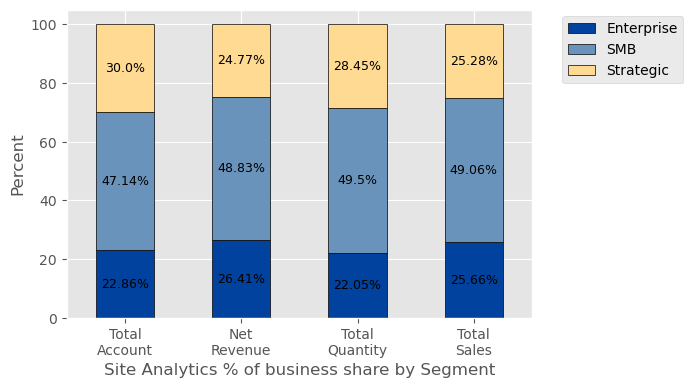

In [36]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod3_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Site Analytics % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Site Analytics" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Site Analytics based on the last year of company activity.
- SMB segment holds the highest share in Total Accounts (47.14%), Net Revenue (48.83%), Total Quantity (49.50%), and Total Sales (49.06%), indicating a dominant presence for the Site Analytics product.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

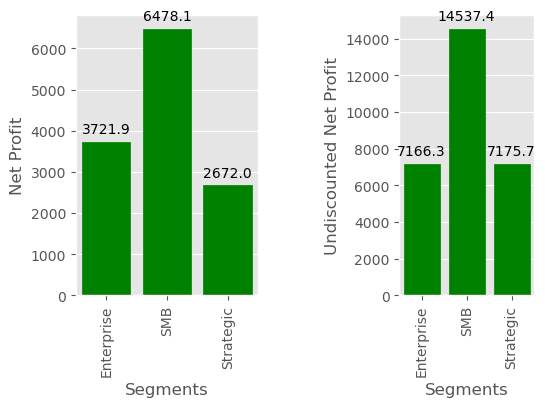

In [37]:
# Site Analytics net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod3_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod3_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads the Site Analytics product in Total Accounts (47.14%), Net Revenue (48.83%), Total Quantity (49.50%), and Total Sales (49.06%). It also shows the highest Net Profit Before Discount (14537.3720) and a substantial positive Net Profit (6478.0960), making it the top performer.
- Enterprise segment maintains significant shares in Total Accounts (22.86%), Net Revenue (26.41%), Total Quantity (22.05%), and Total Sales (25.66%). It demonstrates strong financial performance with a Net Profit Before Discount (7166.3225) and a positive Net Profit (3721.8577).
- Strategic segment, while having lower shares compared to the other segments, still maintains a consistent presence in Total Accounts (30.00%) and Net Revenue (24.77%). It achieves a positive Net Profit of 2672.0495, demonstrating efficient cost management and profitability.

SMB segment is the key contributor to profitability for the Site Analytics product, demonstrating strong contributions in both revenue and profitability. The Enterprise segment also shows positive financial performance, while the Strategic segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

### Further Inquiries on Segments -----------

In [13]:
# Copy-pasted code for Industry queries within segment
# Industries using Site Analytics within the SMB Segment
prod3_2023_industry_SMB = prod3_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod3_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod3_2023_percents_SMB = SMB_account.merge(prod3_2023_industry_SMB,how='left',on=['Industry'])
prod3_2023_percents_SMB['% Account']= prod3_2023_percents_SMB['account'] / prod3_2023_percents_SMB['account'].sum() *100
prod3_2023_percents_SMB['% Quantity']= prod3_2023_percents_SMB['Quantity'] / prod3_2023_percents_SMB['Quantity'].sum() *100
prod3_2023_percents_SMB['% Sales']= prod3_2023_percents_SMB['Sales'] / prod3_2023_percents_SMB['Sales'].sum() *100
prod3_2023_percents_SMB['% Net Revenue']= prod3_2023_percents_SMB['discounted_sales'] / prod3_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod3_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod3_SMB = percents_SMB.columns.tolist()
# Industries using Site Analytics within the Strategic Segment
prod3_2023_industry_Strategic = prod3_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod3_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod3_2023_percents_Strategic = Strategic_account.merge(prod3_2023_industry_Strategic,how='left',on=['Industry'])
prod3_2023_percents_Strategic['% Account']= prod3_2023_percents_Strategic['account'] / prod3_2023_percents_Strategic['account'].sum() *100
prod3_2023_percents_Strategic['% Quantity']= prod3_2023_percents_Strategic['Quantity'] / prod3_2023_percents_Strategic['Quantity'].sum() *100
prod3_2023_percents_Strategic['% Sales']= prod3_2023_percents_Strategic['Sales'] / prod3_2023_percents_Strategic['Sales'].sum() *100
prod3_2023_percents_Strategic['% Net Revenue']= prod3_2023_percents_Strategic['discounted_sales'] / prod3_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod3_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod3_Strategic = percents_Strategic.columns.tolist()
# Industries using Site Analytics within the Enterprise Segment
prod3_2023_industry_Enterprise = prod3_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod3_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod3_2023_percents_Enterprise = Enterprise_account.merge(prod3_2023_industry_Enterprise,how='left',on=['Industry'])
prod3_2023_percents_Enterprise['% Account']= prod3_2023_percents_Enterprise['account'] / prod3_2023_percents_Enterprise['account'].sum() *100
prod3_2023_percents_Enterprise['% Quantity']= prod3_2023_percents_Enterprise['Quantity'] / prod3_2023_percents_Enterprise['Quantity'].sum() *100
prod3_2023_percents_Enterprise['% Sales']= prod3_2023_percents_Enterprise['Sales'] / prod3_2023_percents_Enterprise['Sales'].sum() *100
prod3_2023_percents_Enterprise['% Net Revenue']= prod3_2023_percents_Enterprise['discounted_sales'] / prod3_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod3_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod3_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

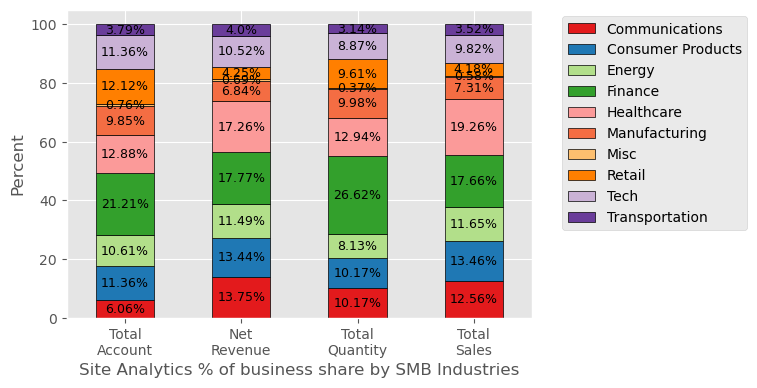

In [39]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod3_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Site Analytics % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (21.21%), Total Quantity (26.62%), Net Revenue (17.77%), and Total Sales (17.66%).
- Healthcare industry shows strong performance with high shares in Net Revenue (17.26%) and Total Sales (19.26%).
- Communications and Consumer Products industries contribute significantly across categories, with substantial shares in Net Revenue (13.75% and 13.44%) and Total Sales (12.56% and 13.46%).
- Tech, Retail, and Energy industries also maintain consistent shares across categories, showing notable contributions to Net Revenue and Total Sales.
- Manufacturing has moderate shares in Total Accounts (9.85%) and Net Revenue (6.84%).
- Misc industry has the lowest shares across categories but still maintains a presence in the segment.
- Transportation industry, despite lower shares, contributes to Total Sales (3.52%).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

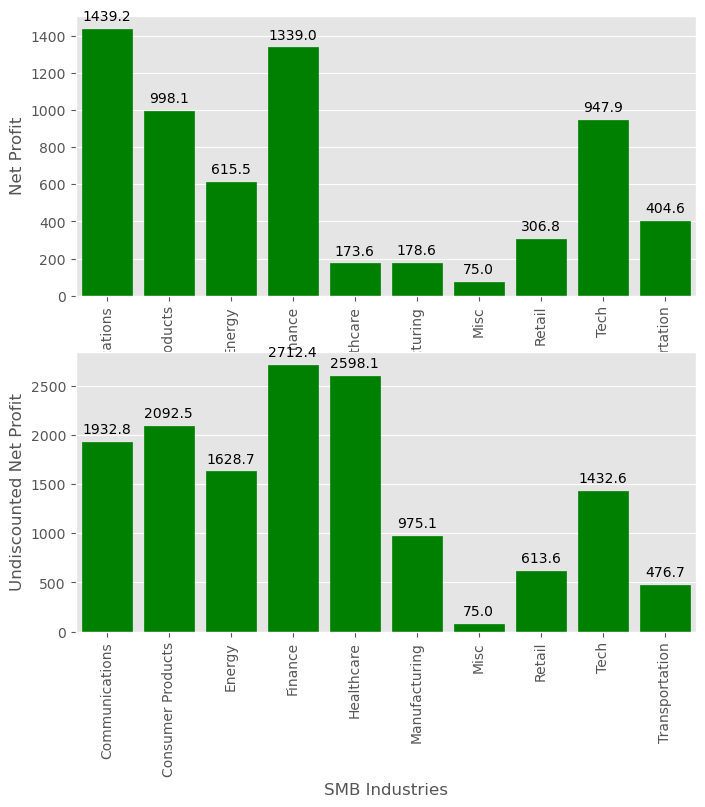

In [40]:
# Site Analytics net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod3_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod3_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the SMB segment in Total Accounts (21.21%), Total Quantity (26.62%), Net Revenue (17.77%), and Total Sales (17.66%). It also shows a high Net Profit Before Discount (2712.3783) and a substantial positive Net Profit (1339.0367).
- Healthcare industry shows strong performance with high shares in Net Revenue (17.26%) and Total Sales (19.26%), but reports a relatively low Net Profit (173.5662) despite a high Net Profit Before Discount (2598.0742).
- Communications and Consumer Products industries contribute significantly across categories, with substantial Net Profits of 1439.1528 and 998.1310, respectively.
- Tech and Retail industries, despite moderate shares, maintain positive net profits of 947.8715 and 306.7667, respectively.
- Energy industry maintains significant shares in Net Revenue (11.49%) and Total Sales (11.65%), achieving a positive Net Profit of 615.4751.
- Manufacturing industry has moderate shares and achieves a positive Net Profit of 178.5657.
- Misc industry, despite the lowest shares, reports a positive Net Profit (74.9750).
- Transportation industry, despite lower shares, contributes to Total Sales (3.52%) and achieves a positive Net Profit (404.5553).

Finance, Healthcare, Communications, and Consumer Products industries are key contributors to profitability within the SMB segment of the Site Analytics product, demonstrating strong contributions in both revenue and profitability. The Tech, Retail, and Energy industries also show positive financial performance, while the Manufacturing, Misc, and Transportation industries maintain a presence and contribute positively.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

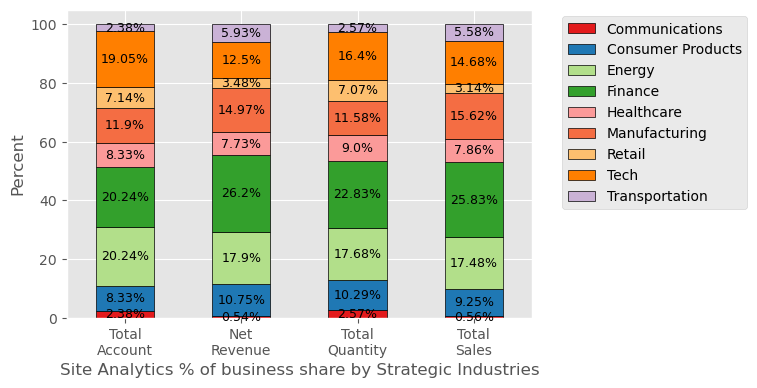

In [16]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod3_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Site Analytics % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (20.24%), Net Revenue (26.20%), Total Quantity (22.83%), and Total Sales (25.83%).
- Energy and Tech industries also show significant shares across categories, contributing notably to Net Revenue and Total Sales.
- Manufacturing and Consumer Products industries maintain consistent shares, showing notable contributions to Net Revenue and Total Sales.
- Healthcare and Transportation industries, while having lower shares, still maintain a presence in the segment.
- Communications and Retail industries show the lowest shares across categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

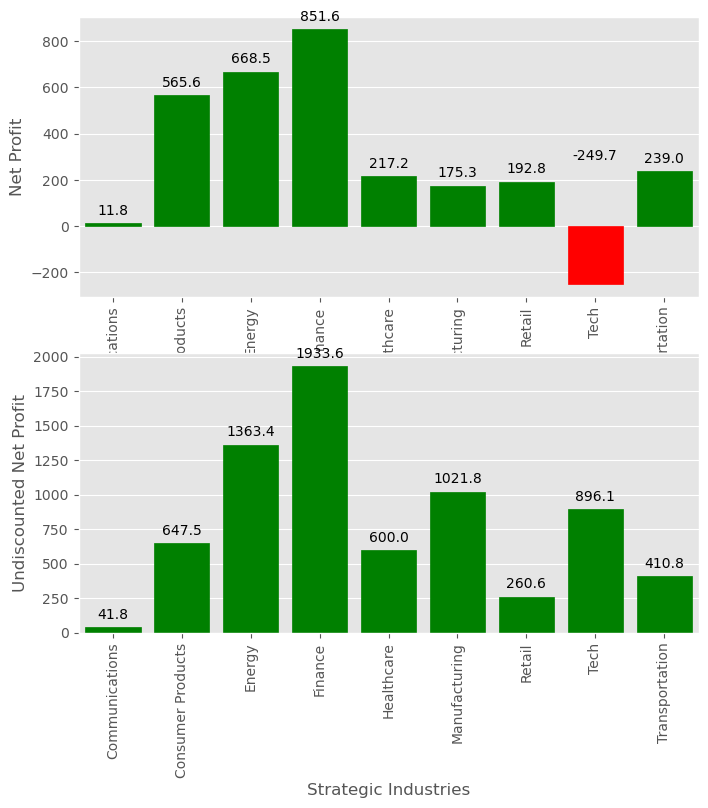

In [42]:
# Site Analytics net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod3_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod3_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the Strategic segment in Total Accounts (20.24%), Net Revenue (26.20%), Total Quantity (22.83%), and Total Sales (25.83%). It also shows the highest Net Profit Before Discount (1933.5759) and a substantial positive Net Profit (851.5943).
- Energy industry maintains significant shares in Net Revenue (17.90%) and Total Sales (17.48%), achieving a positive Net Profit of 668.4844.
- Consumer Products and Healthcare industries contribute significantly across categories, achieving positive net profits of 565.6132 and 217.1759, respectively.
- Manufacturing and Tech industries show notable contributions to Net Revenue and Total Sales, but the Tech industry reports a negative Net Profit of -249.6930, indicating challenges in achieving profitability.
- Retail and Transportation industries, while having lower shares, still maintain a positive Net Profit of 192.8180 and 238.9670, respectively.
- Communications industry reports the lowest shares and a positive Net Profit of 11.7729.

Finance, Energy, Consumer Products, and Healthcare industries are key contributors to profitability within the Strategic segment of the Site Analytics product, demonstrating strong contributions in both revenue and profitability. The Manufacturing, Retail, and Transportation industries also show positive financial performance. The Tech industry faces significant challenges in achieving profitability, while the Communications industry maintains a presence and contributes positively.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

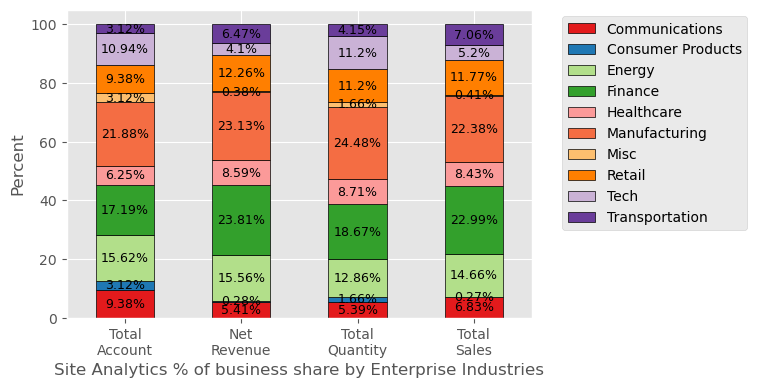

In [43]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod3_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Site Analytics % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Manufacturing industry leads in Total Accounts (21.88%), Total Quantity (24.48%), Net Revenue (23.13%), and Total Sales (22.38%).
- Finance industry holds significant shares in Net Revenue (23.81%) and Total Sales (22.99%), contributing 17.19% to Total Accounts.
- Energy industry shows strong performance with substantial shares in Net Revenue (15.56%) and Total Sales (14.66%).
- Retail and Tech industries maintain consistent shares across categories, contributing notably to Net Revenue and Total Sales.
- Healthcare industry shows notable shares in Net Revenue (8.59%) and Total Sales (8.43%).
- Communications industry maintains a presence with 9.38% of Total Accounts and 5.41% of Net Revenue.
- Consumer Products, Misc, and Transportation industries have lower shares across categories but still maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

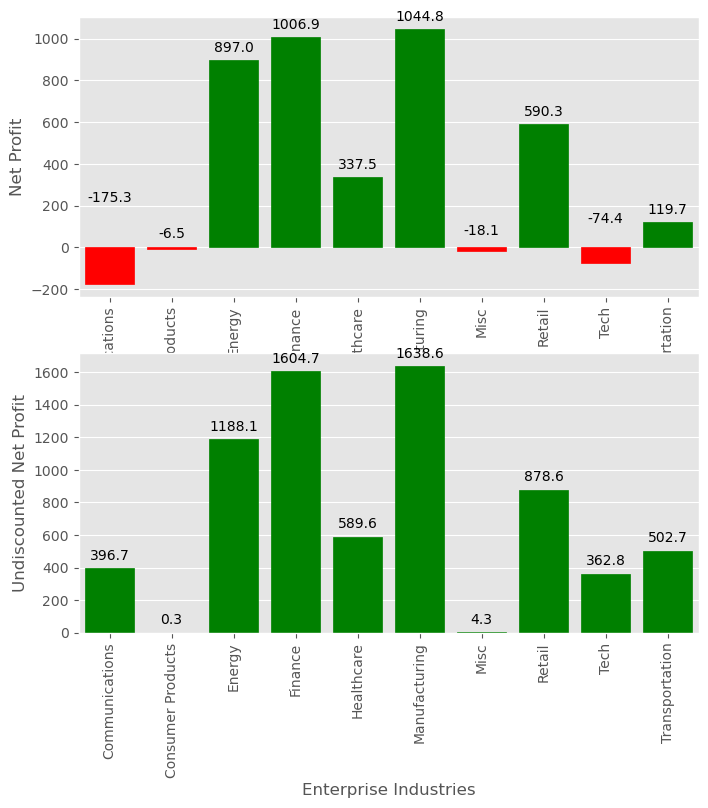

In [44]:
# Site Analytics net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod3_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod3_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Manufacturing industry leads in Total Accounts (21.88%), Total Quantity (24.48%), Net Revenue (23.13%), and Total Sales (22.38%). It also shows a high Net Profit Before Discount (1638.5870) and a substantial positive Net Profit (1044.8094).
- Finance industry holds significant shares in Net Revenue (23.81%) and Total Sales (22.99%), with a high Net Profit Before Discount (1604.7105) and a substantial positive Net Profit (1006.8649).
- Energy industry shows strong performance with substantial shares in Net Revenue (15.56%) and Total Sales (14.66%), achieving a positive Net Profit of 897.0039.
- Retail and Healthcare industries maintain consistent shares across categories, achieving positive net profits of 590.2668 and 337.4928, respectively.
- Communications and Tech industries, despite maintaining a presence, report negative net profits of -175.2915 and -74.3521, respectively, indicating challenges in achieving profitability.
- Misc and Consumer Products industries have the lowest shares across categories and report negative net profits of -18.0974 and -6.5221, respectively.
- Transportation industry shows moderate shares and achieves a positive Net Profit of 119.6830.

Manufacturing, Finance, and Energy industries are key contributors to profitability within the Enterprise segment of the Site Analytics product, demonstrating strong contributions in both revenue and profitability. The Retail and Healthcare industries also show positive financial performance. The Communications and Tech industries face significant challenges in achieving profitability, while the Misc and Consumer Products industries maintain a presence but report negative net profits. The Transportation industry, although moderate in shares, contributes positively.

**Key findings:**
1. For the Site Analytics product, prioritize the SMB segment, which leads in Total Accounts (47.14%), Net Revenue (48.83%), Total Quantity (49.50%), and Total Sales (49.06%), with the highest Net Profit Before Discount (14,537.37) and a substantial Net Profit (6,478.10). Maintain the performance of both the Strategic segment (Total Accounts: 30.00%, Net Revenue: 24.77%, Net Profit: 2,672.05) and the Enterprise segment (Net Profit Before Discount: 7,166.32, Net Profit: 3,721.86).

### Regional EDA

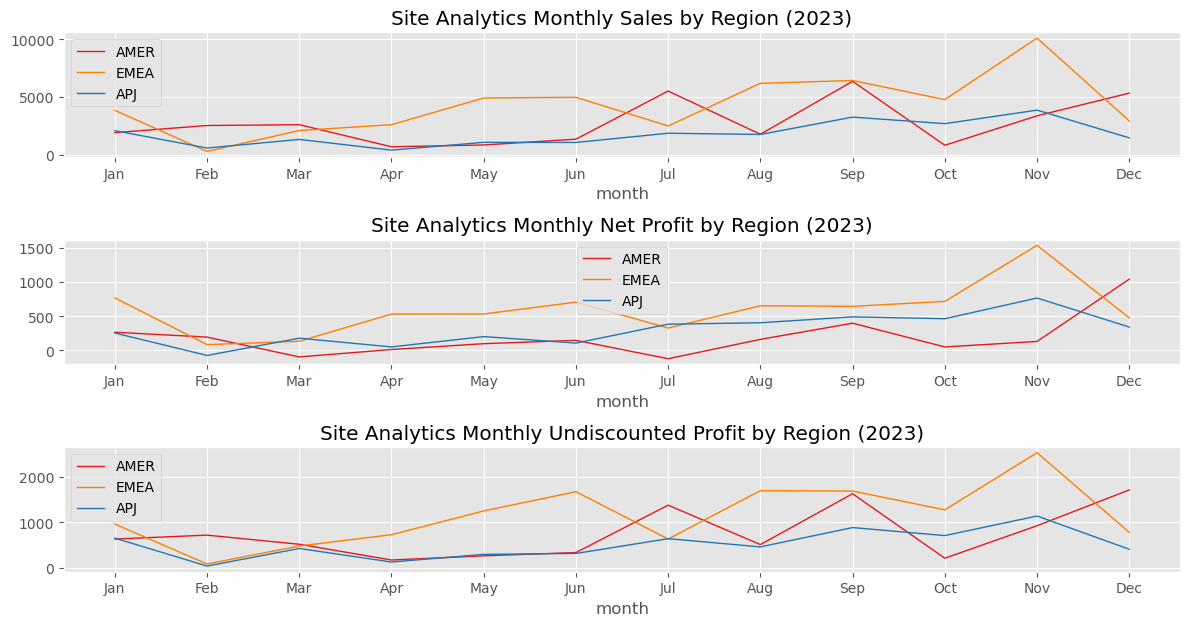

In [8]:
# Site Analytics Monthly Income EDA by Region (2023)
prod3_region_month = prod3_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod3_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod3_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod3_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Site Analytics Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod3_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod3_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod3_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Site Analytics Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod3_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod3_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod3_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Site Analytics Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

EMEA consistently excels in sales and net profits, particularly in the middle and latter parts of the year, with periodic peaks. AMER shows fluctuations but performs well in certain months, despite being significantly impacted by discounts. APJ has lower sales and profits but is more consistent, although discounts often turn positive profits negative.
- EMEA consistently leads in sales and net profits, particularly excelling in the latter part of the year. While discounts did affect net profits, EMEA managed to maintain positive net profits throughout the year. The region exhibited periodic peaks, especially in May, June, August, September, and November, while maintaining overall stability across the months.
- AMER's performance exhibited significant fluctuations, with strong peaks in January, July, September, and December. Discounts had a substantial impact on net profits, particularly in March and July, often turning otherwise positive figures negative.
- APJ's sales and net profits is generally lower than EMEA and AMER. Discounts heavily impacted net profits, often turning them negative despite substantial sales.


Performance Highlights
- Highest Sales: In EMEA, November shows the highest sales of 10096.78.
- Highest Net Profit: The highest net profit is seen in EMEA, November, with a net profit of 1535.33.
- Highest Undiscounted Profit: EMEA in November also shows the highest undiscounted profit at 2537.4764.

In [8]:
prod3_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,26,1897.5720,1529.4592,631.2207,263.1079
1,AMER,2,37,2515.1320,1988.5928,718.2626,191.7234
2,AMER,3,29,2586.4160,1971.1696,516.5369,-98.7095
3,AMER,4,13,674.3820,515.0292,169.3764,10.0236
4,AMER,5,18,829.4560,663.5648,261.2650,95.3738
5,AMER,6,30,1331.4340,1141.6620,333.8472,144.0752
6,AMER,7,42,5502.5820,3997.9556,1379.6004,-125.0260
7,AMER,8,30,1757.4560,1405.9648,510.0362,158.5450
8,AMER,9,50,6345.3460,5109.5068,1631.1831,395.3439
9,AMER,10,35,805.6880,644.5504,208.5787,47.4411


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

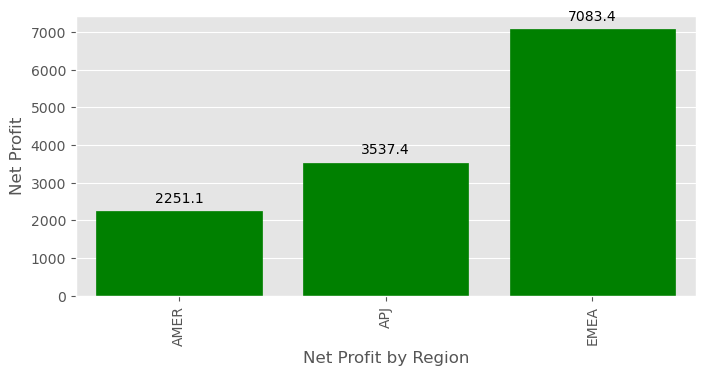

In [9]:
prod3_region = prod3_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod3_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [10]:
prod3_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,411,32923.1700,26172.8204,9001.4728,2251.1232
1,APJ,200,21242.2580,18696.3204,6083.3685,3537.4309
2,EMEA,482,51477.4640,44766.4008,13794.5123,7083.4491


High-Performing Region
- EMEA leads in both sales and net profit figures, demonstrating strong performance even after discounts.
- While EMEA leads in sales and net profits, discounts heavily impact their final net profit, sometimes resulting in negative figures. Additionally, maintaining consistent high performance in the early months of the year poses a challenge. Strategic adjustments to better manage discounts and achieve early-year growth are essential.

Mixed Performance
- APJ has the lowest sales but manages to achieve a higher net profit than AMER after discounts are applied.
- APJ faces considerable fluctuations in both sales and net profits, with notable peaks and deep valleys. Discounts frequently turn positive profits negative, making it challenging to maintain consistent profitability. Effective discount management and achieving steady sales growth are critical areas for improvement.

Challenging Region
- AMER shows substantial sales and net profit before discounts but is significantly impacted by discounts.
- AMER struggles with maintaining consistent sales and profit levels throughout the year, showing significant fluctuations. Discounts significantly impact net profits, turning otherwise positive figures negative in some months. Balancing sales volume with profitability remains a key challenge.

In [9]:
grouped = prod3_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [10]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

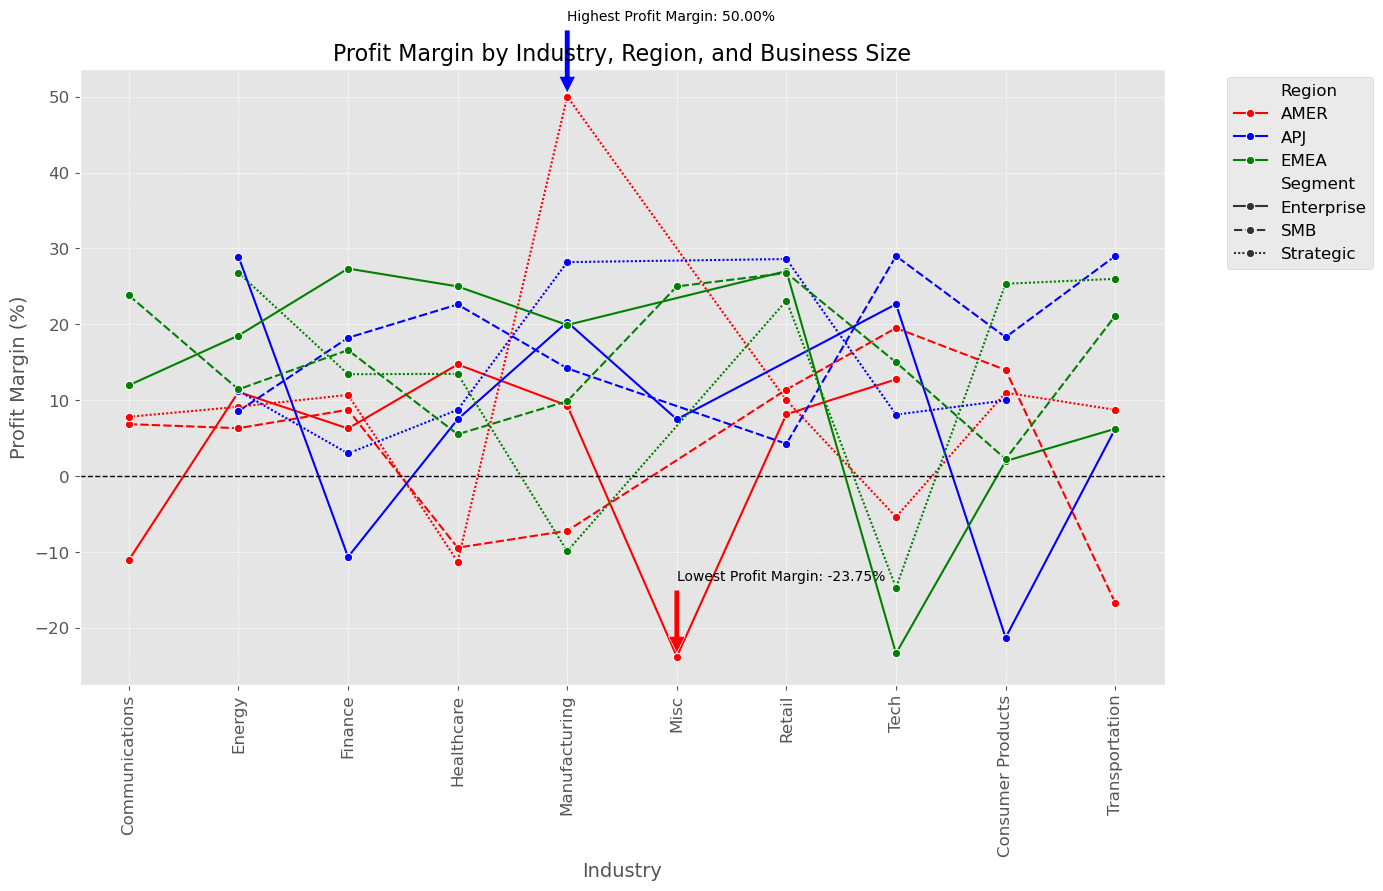

In [11]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [12]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])


#### Cross-segment SMB

In [13]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

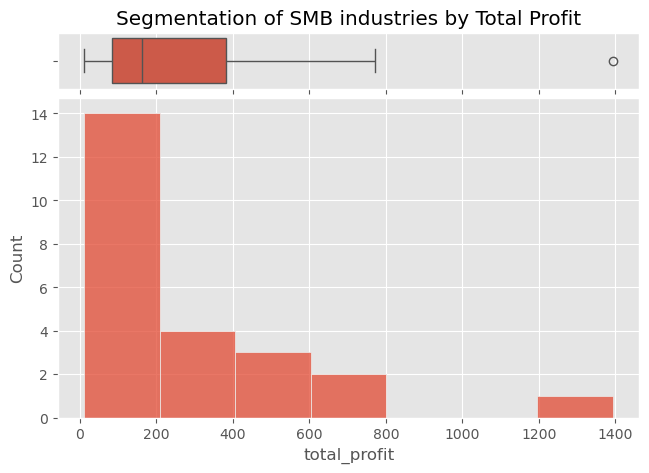

0.0000     11.5971
0.2500     84.5304
0.5000    162.1027
0.7500    383.1786
1.0000   1393.8648
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 383.18 in profit
- 3 (Good) : Contributes between 162.10 and 383.18 in profit
- 2 (Marginal) : Contributes between 84.53 and 162.10 in profit
- 1 (Underperforming) : Contributes less than 84.53 in profit


In [14]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [15]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
58,EMEA,SMB,Communications,1393.8648,0.1143,4
15,AMER,SMB,Tech,772.5565,0.2000,4
34,APJ,SMB,Consumer Products,705.8349,0.1200,4
61,EMEA,SMB,Finance,601.0380,0.1231,4
36,APJ,SMB,Finance,487.0236,0.1600,4
60,EMEA,SMB,Energy,435.7340,0.1600,4
62,EMEA,SMB,Healthcare,365.6601,0.1600,3
67,EMEA,SMB,Transportation,277.9800,0.0667,3
9,AMER,SMB,Consumer Products,264.4871,0.2000,3
11,AMER,SMB,Finance,250.9751,0.2167,3


In [16]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Communications in EMEA, Tech in AMER, Consumer Products in APJ, Finance in EMEA, Finance in APJ, Energy in EMEA are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in EMEA, Transportation in EMEA, Consumer Products in AMER, Finance in AMER, Retail in EMEA, Tech in EMEA all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in EMEA, Energy in APJ, Transportation in APJ, Manufacturing in APJ, Retail in AMER, Healthcare in APJ, Misc in EMEA, Communications in AMER, Energy in AMER, Consumer Products in EMEA, Retail in APJ, Tech in APJ are underperforming.
These SMB industries strug

In [17]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

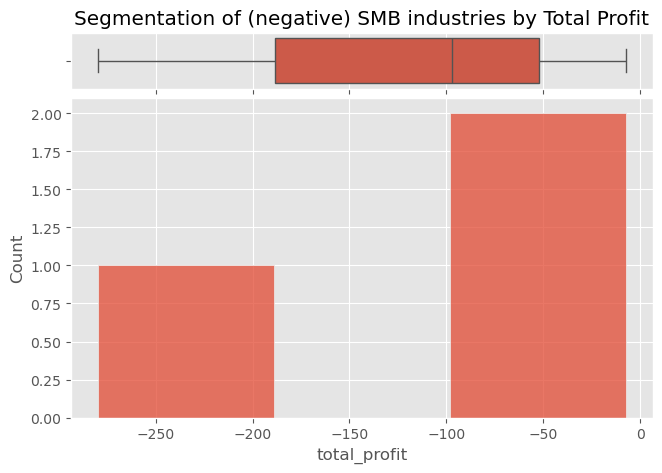

0.0000   -279.8094
0.2500   -188.5700
0.5000    -97.3306
0.7500    -52.3633
1.0000     -7.3960
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -188.57 in profit
- 3 (Significant) : Loses between -188.57 and -97.33 in profit
- 2 (Negative) : Loses between -97.33 and -52.36 in profit
- 1 (Marginal) : Loses less than -52.36 in profit


In [18]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [19]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
12,AMER,SMB,Healthcare,-279.8094,0.2286,4
13,AMER,SMB,Manufacturing,-97.3306,0.3000,3
16,AMER,SMB,Transportation,-7.3960,0.4000,1


Looking at the losses in the SMB segment, it's clear that all the struggling industries are in the AMER region.

In [21]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_negative_profit_metrics[smb_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "is a SMB industry contributing to substantial losses and is considered high-risk.\nStrategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "suffer notable losses.\nCareful analysis and targeted strategies is essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nIt require attention to prevent slipping into more significant losses.\n")


Healthcare in AMER is a SMB industry contributing to substantial losses and is considered high-risk.
Strategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Manufacturing in AMER suffer notable losses.
Careful analysis and targeted strategies is essential to stabilize and mitigate further declines.

Transportation in AMER incur moderate losses.
It require attention to prevent slipping into more significant losses.



Healthcare, Manufacturing, and Transportation in the AMER region contribute losses to the SMB segment (-279.8094, -97.3306, and -7.3960, respectively).

Top-performing SMB industries are Communications in EMEA (1393.8648), Tech in AMER (772.5565), Consumer Products in APJ (705.8349), Finance in EMEA (601.0380), Finance in APJ (487.0236), and Energy in EMEA (435.7340).

Comparing the two, total gains (4396.0518) far outweigh the total losses (-384.5360) by 4011.5158. This indicates that, overall, the SMB segment has a strong financial performance despite relatively lower losses in some industries within the AMER region.

In [22]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the SMB segment
total_metrics_SMB = prod3.query("Segment == 'SMB'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod3_2023_industry_region_SMB = prod3.query("Segment == 'SMB' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
SMB_account = prod3.query("Segment == 'SMB'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod3_2023_percents_SMB = SMB_account.merge(prod3_2023_industry_region_SMB, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod3_2023_percents_SMB = prod3_2023_percents_SMB.dropna()

# Calculate percentages
prod3_2023_percents_SMB['% Account'] = prod3_2023_percents_SMB['account'] / SMB_account['account'].sum() * 100
prod3_2023_percents_SMB['% Quantity'] = prod3_2023_percents_SMB['Quantity'] / total_metrics_SMB['Quantity'] * 100
prod3_2023_percents_SMB['% Sales'] = prod3_2023_percents_SMB['Sales'] / total_metrics_SMB['Sales'] * 100
prod3_2023_percents_SMB['% Net Revenue'] = prod3_2023_percents_SMB['discounted_sales'] / total_metrics_SMB['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Healthcare', 'Manufacturing', 'Transportation']  
specific_regions = ['AMER']
filtered_SMB = prod3_2023_percents_SMB[(prod3_2023_percents_SMB['Industry'].isin(specific_industries)) & 
                                       (prod3_2023_percents_SMB['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [24]:
# to see detailed Discounted orders for SMB industries with significant losses
filtered_SMB2 = prod3_2023[(prod3_2023['Industry'].isin(specific_industries)) & (prod3_2023['Region'].isin(specific_regions)) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [25]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Healthcare,AMER,0.2000,6
1,Healthcare,AMER,0.4000,1
2,Manufacturing,AMER,0.2000,2
3,Manufacturing,AMER,0.4000,2
4,Transportation,AMER,0.4000,1


In [26]:
# Dataset With Filter (prod3_2023['net_profit'] < 0) 
filtered_SMB2 = prod3_2023[(prod3_2023['Industry'].isin(specific_industries)) & (prod3_2023['Region'].isin(specific_regions)) & (prod3_2023['net_profit'] < 0) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [27]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Healthcare,AMER,0.4000,1
1,Manufacturing,AMER,0.2000,1
2,Manufacturing,AMER,0.4000,1
3,Transportation,AMER,0.4000,1


By comparing the two datasets, I identified SMB orders with significant negative net profits. Despite discounts of 20% and 40%, only some orders resulted in losses. Negative profits are thus not strongly linked to discounted orders, suggesting other factors may contribute to the losses. These could include inefficiencies in operations or higher costs of goods sold. Proper evaluations should analyze the impact on net margins, understand the cost structure, assess customer acquisition costs, and ensure the discount strategy aligns with overall financial goals.

#### Cross-segment Strategic

In [28]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

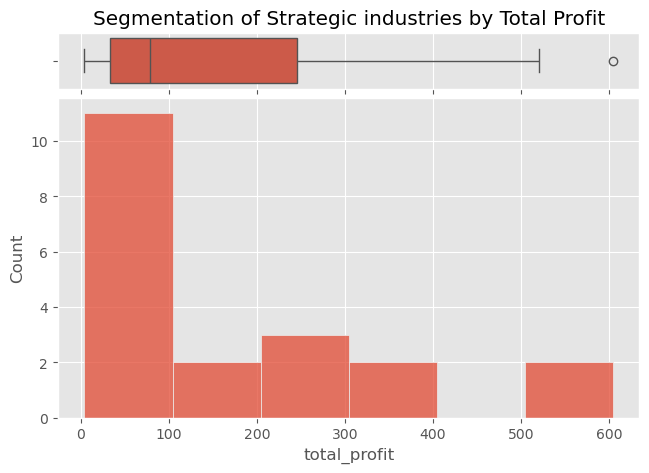

0.0000     3.8655
0.2500    33.0221
0.5000    78.7774
0.7500   245.0106
1.0000   604.5104
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 245.01 in profit
- 3 (Good) : Contributes between 78.78 and 245.01 in profit
- 2 (Marginal) : Contributes between 33.02 and 78.78 in profit
- 1 (Underperforming) : Contributes less than 33.02 in profit


In [29]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")

In [30]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
70,EMEA,Strategic,Finance,604.5104,0.1091,4
68,EMEA,Strategic,Consumer Products,520.1669,0.1000,4
46,APJ,Strategic,Manufacturing,399.8613,0.0000,4
69,EMEA,Strategic,Energy,346.1044,0.0667,4
19,AMER,Strategic,Energy,250.3872,0.2000,4
20,AMER,Strategic,Finance,243.2184,0.2000,3
71,EMEA,Strategic,Healthcare,230.3577,0.0400,3
75,EMEA,Strategic,Transportation,163.7870,0.0000,3
73,EMEA,Strategic,Retail,144.1528,0.1000,3
48,APJ,Strategic,Tech,82.3748,0.2000,3


In [31]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in EMEA, Consumer Products in EMEA, Manufacturing in APJ, Energy in EMEA, Energy in AMER are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Finance in AMER, Healthcare in EMEA, Transportation in EMEA, Retail in EMEA, Tech in APJ all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Transportation in AMER, Energy in APJ, Retail in APJ, Consumer Products in AMER, Manufacturing in AMER, Healthcare in APJ, Communications in AMER, Retail in AMER, Consumer Products in APJ, Finance in APJ are underperforming.
These Strategic industries struggle with profitability and should be approached

In [32]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

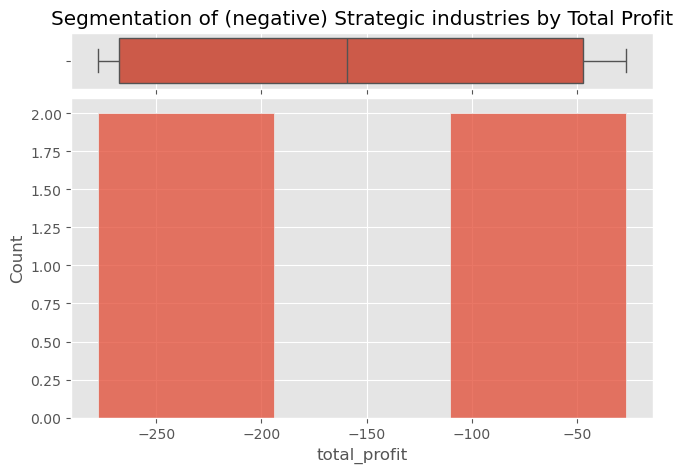

0.0000   -277.8901
0.2500   -267.5434
0.5000   -159.1361
0.7500    -47.2884
1.0000    -26.6204
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -267.54 in profit
- 3 (Significant) : Loses between -267.54 and -159.14 in profit
- 2 (Negative) : Loses between -159.14 and -47.29 in profit
- 1 (Marginal) : Loses less than -47.29 in profit


In [33]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [34]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
74,EMEA,Strategic,Tech,-277.8901,0.1714,4
72,EMEA,Strategic,Manufacturing,-264.0945,0.2286,3
24,AMER,Strategic,Tech,-54.1777,0.2571,2
21,AMER,Strategic,Healthcare,-26.6204,0.3000,1


In [36]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_negative_profit_metrics[strategic_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "is a Strategic industry contributing to substantial losses and is considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "suffer notable losses.\nCareful analysis and targeted strategies is essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Tech in EMEA is a Strategic industry contributing to substantial losses and is considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Manufacturing in EMEA suffer notable losses.
Careful analysis and targeted strategies is essential to stabilize and mitigate further declines.

Tech in AMER, Healthcare in AMER incur moderate losses.
They require attention to prevent slipping into more significant losses.



Top-performing Strategic industries are Finance in EMEA (604.5104), Consumer Products in EMEA (520.1669), Manufacturing in APJ (399.8613), Energy in EMEA (346.1044), and Energy in AMER (250.3872).

Meanwhile, Tech and Manufacturing in the EMEA region contribute the highest losses to the Strategic segment (-277.8901 and -264.0945, respectively). Other notable losses include Tech (-54.1777) and Healthcare (-26.6204) in the AMER region.

Comparing the two, total gains (2,120.0302) far outweigh the total losses (-622.7827) by 1,497.2475. This indicates that, overall, the Strategic segment has a positive financial performance despite significant losses in some industries within the EMEA and AMER regions.

In [38]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Strategic segment
total_metrics_strategic = prod3.query("Segment == 'Strategic'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod3_2023_industry_region_strategic = prod3.query("Segment == 'Strategic' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
strategic_account = prod3.query("Segment == 'Strategic'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
strategic_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod3_2023_percents_strategic = strategic_account.merge(prod3_2023_industry_region_strategic, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod3_2023_percents_strategic = prod3_2023_percents_strategic.dropna()

# Calculate percentages
prod3_2023_percents_strategic['% Account'] = prod3_2023_percents_strategic['account'] / strategic_account['account'].sum() * 100
prod3_2023_percents_strategic['% Quantity'] = prod3_2023_percents_strategic['Quantity'] / total_metrics_strategic['Quantity'] * 100
prod3_2023_percents_strategic['% Sales'] = prod3_2023_percents_strategic['Sales'] / total_metrics_strategic['Sales'] * 100
prod3_2023_percents_strategic['% Net Revenue'] = prod3_2023_percents_strategic['discounted_sales'] / total_metrics_strategic['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Tech', 'Manufacturing']
specific_regions = ['EMEA']
filtered_strategic = prod3_2023_percents_strategic[(prod3_2023_percents_strategic['Industry'].isin(specific_industries)) & 
                                       (prod3_2023_percents_strategic['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_strategic.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [39]:
# to see detailed Discounted orders for Strategic industries with significant losses
filtered_strategic2 = prod3_2023[(prod3_2023['Industry'].isin(specific_industries)) & (prod3_2023['Region'].isin(specific_regions)) ]
filtered_strategic3 = filtered_strategic2[filtered_strategic2['Segment'] == 'Strategic']
grouped_data = filtered_strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [40]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Manufacturing,EMEA,0.0000,3
1,Manufacturing,EMEA,0.4000,4
2,Tech,EMEA,0.0000,3
3,Tech,EMEA,0.2000,2
4,Tech,EMEA,0.4000,2


In [41]:
# Dataset With Filter (prod3_2023['net_profit'] < 0) 
filtered_strategic2 = prod3_2023[(prod3_2023['Industry'].isin(specific_industries)) & (prod3_2023['Region'].isin(specific_regions)) & (prod3_2023['net_profit'] < 0) ]
filtered_strategic3 = filtered_strategic2[filtered_strategic2['Segment'] == 'Strategic']
grouped_data = filtered_strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [42]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Manufacturing,EMEA,0.4000,4
1,Tech,EMEA,0.2000,1
2,Tech,EMEA,0.4000,2


By comparing the two datasets, I identified which Strategic orders had negative net profits. This comparison highlighted that orders with higher discounts (0.4000) appeared in both datasets, especially in the filtered one for negative profits.

For the Strategic segment it can be observed that negative profits are associated with high discounted orders, suggesting that these discounts may have been applied without thorough calculations of profitability. 

#### Cross-segment Enterprise

In [43]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

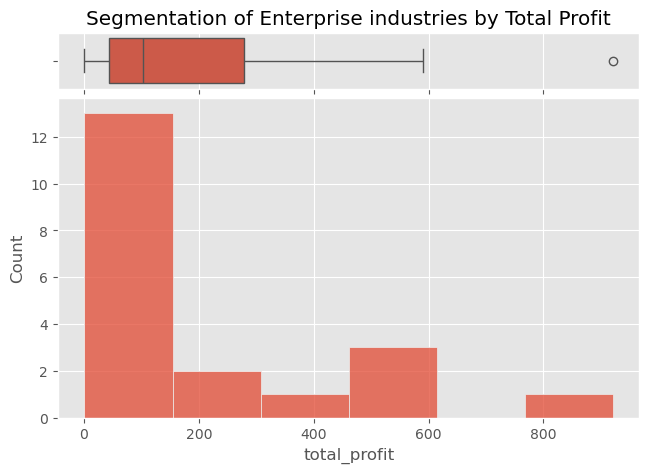

0.0000     0.7794
0.2500    42.8515
0.5000   103.1060
0.7500   278.3822
1.0000   921.0789
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 278.38 in profit
- 3 (Good) : Contributes between 103.11 and 278.38 in profit
- 2 (Marginal) : Contributes between 42.85 and 103.11 in profit
- 1 (Underperforming) : Contributes less than 42.85 in profit


In [44]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [45]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
52,EMEA,Enterprise,Finance,921.0789,0.0000,4
27,APJ,Enterprise,Energy,589.7348,0.0000,4
30,APJ,Enterprise,Manufacturing,505.5752,0.1333,4
55,EMEA,Enterprise,Retail,472.5399,0.0000,4
54,EMEA,Enterprise,Manufacturing,386.6828,0.1000,4
3,AMER,Enterprise,Healthcare,242.2820,0.2000,3
51,EMEA,Enterprise,Energy,230.3542,0.2000,3
4,AMER,Enterprise,Manufacturing,152.5514,0.2000,3
2,AMER,Enterprise,Finance,145.1992,0.2400,3
6,AMER,Enterprise,Retail,117.7269,0.2000,3


In [46]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Energy in APJ, Manufacturing in APJ, Retail in EMEA, Manufacturing in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in AMER, Energy in EMEA, Manufacturing in AMER, Finance in AMER, Retail in AMER all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Transportation in APJ, Energy in AMER, Healthcare in EMEA, Tech in APJ, Tech in AMER, Transportation in EMEA, Healthcare in APJ, Communications in EMEA, Misc in APJ, Consumer Products in EMEA are underperforming.
These Enterprise industries struggle with profitability and should be approached with cautio

In [47]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

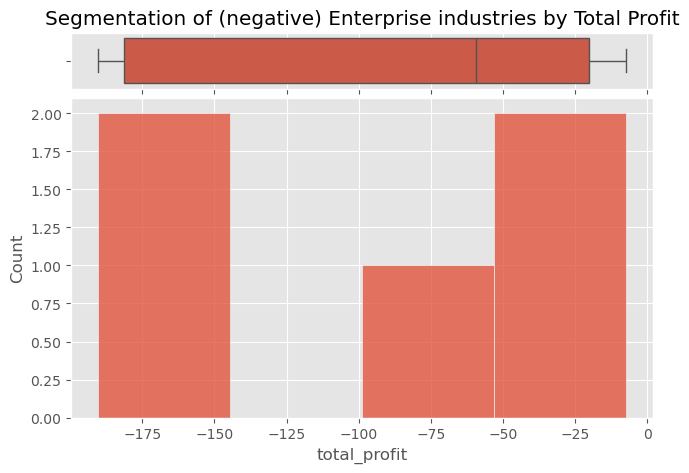

0.0000   -190.4373
0.2500   -181.2650
0.5000    -59.4132
0.7500    -20.1362
1.0000     -7.3015
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -181.26 in profit
- 3 (Significant) : Loses between -181.26 and -59.41 in profit
- 2 (Negative) : Loses between -59.41 and -20.14 in profit
- 1 (Marginal) : Loses less than -20.14 in profit


In [48]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [49]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
0,AMER,Enterprise,Communications,-190.4373,0.2500,4
56,EMEA,Enterprise,Tech,-181.2650,0.4000,4
28,APJ,Enterprise,Finance,-59.4132,0.2000,3
5,AMER,Enterprise,Misc,-20.1362,0.2000,2
26,APJ,Enterprise,Consumer Products,-7.3015,0.2000,1


In [51]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_negative_profit_metrics[enterprise_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are Enterprise industries contributing to substantial losses and are considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "suffer notable loss.\nCareful analysis and targeted strategies is essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Communications in AMER, Tech in EMEA are Enterprise industries contributing to substantial losses and are considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Finance in APJ suffer notable loss.
Careful analysis and targeted strategies is essential to stabilize and mitigate further declines.

Misc in AMER, Consumer Products in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



Top-performing Enterprise industries are Finance in EMEA (921.0789), Energy in APJ (589.7348), Manufacturing in APJ (505.5752), Retail in EMEA (472.5399), and Manufacturing in EMEA (386.6828).

Meanwhile, Communications in AMER and Tech in EMEA contributes the highest losses to the Enterprise segment (-190.4373; -181.2650, respectively). Other notable losses include Finance in APJ (-59.4132), Misc in AMER (-20.1362), and Consumer Products in APJ (-7.3015).

Comparing the two, total gains (2,875.6116) outweigh the total losses (-458.5532) by 2,417.0584. This indicates that, overall, the Enterprise segment has a strong financial performance. Despite losses being relatively low to the gains, addressing and mitigating these losses is crucial for sustained profitability and balanced growth across all regions.

In [54]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Enterprise segment
total_metrics_enterprise = prod3.query("Segment == 'Enterprise'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod3_2023_industry_region_enterprise = prod3.query("Segment == 'Enterprise' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
enterprise_account = prod3.query("Segment == 'Enterprise'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
enterprise_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod3_2023_percents_enterprise = enterprise_account.merge(prod3_2023_industry_region_enterprise, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod3_2023_percents_enterprise = prod3_2023_percents_enterprise.dropna()

# Calculate percentages
prod3_2023_percents_enterprise['% Account'] = prod3_2023_percents_enterprise['account'] / enterprise_account['account'].sum() * 100
prod3_2023_percents_enterprise['% Quantity'] = prod3_2023_percents_enterprise['Quantity'] / total_metrics_enterprise['Quantity'] * 100
prod3_2023_percents_enterprise['% Sales'] = prod3_2023_percents_enterprise['Sales'] / total_metrics_enterprise['Sales'] * 100
prod3_2023_percents_enterprise['% Net Revenue'] = prod3_2023_percents_enterprise['discounted_sales'] / total_metrics_enterprise['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Communications', 'Tech', 'Finance', 'Misc', 'Consumer Products']
specific_regions = ['AMER', 'EMEA', 'APJ']
filtered_enterprise = prod3_2023_percents_enterprise[(prod3_2023_percents_enterprise['Industry'].isin(specific_industries)) & 
                                       (prod3_2023_percents_enterprise['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_enterprise.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [55]:
# to see detailed Discounted orders for Enterprise industries with significant losses
filtered_enterprise2 = prod3_2023[(prod3_2023['Industry'].isin(specific_industries)) & (prod3_2023['Region'].isin(specific_regions)) ]
filtered_enterprise3 = filtered_enterprise2[filtered_enterprise2['Segment'] == 'Enterprise']
grouped_data = filtered_enterprise3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [56]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,AMER,0.0000,1
1,Communications,AMER,0.2000,1
2,Communications,AMER,0.4000,2
3,Communications,EMEA,0.0000,1
4,Communications,EMEA,0.4000,1
5,Consumer Products,APJ,0.2000,1
6,Consumer Products,EMEA,0.0000,1
7,Finance,AMER,0.2000,4
8,Finance,AMER,0.4000,1
9,Finance,APJ,0.2000,3


In [57]:
# Dataset With Filter (prod3_2023['net_profit'] < 0) 
filtered_enterprise2 = prod3_2023[(prod3_2023['Industry'].isin(specific_industries)) & (prod3_2023['Region'].isin(specific_regions)) & (prod3_2023['net_profit'] < 0)  ]
filtered_enterprise3 = filtered_enterprise2[filtered_enterprise2['Segment'] == 'Enterprise']
grouped_data = filtered_enterprise3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [58]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,AMER,0.4000,2
1,Communications,EMEA,0.4000,1
2,Consumer Products,APJ,0.2000,1
3,Finance,AMER,0.2000,1
4,Finance,AMER,0.4000,1
5,Finance,APJ,0.2000,1
6,Misc,AMER,0.2000,1
7,Tech,EMEA,0.4000,1


By comparing the two datasets, I identified Enterprise orders with negative net profits. This analysis showed that higher discounts (0.4000) consistently appeared in both datasets, particularly in the filtered one for negative profits. Additionally, there is are orders with 20% discounts which also resulted in loss, indicating that even moderate discounts can lead to negative profits if not carefully calculated.

**Key findings:**
1. EMEA leads in sales and net profits, excelling especially in the latter part of the year with peaks in May, June, August, September, and November. Despite discounts, EMEA maintains positive net profits year-round, showcasing stability and resilience. It consistently demonstrates the highest overall performance in sales and net profits.
2. AMER shows strong peaks in January, July, September, and December, but discounts heavily impact net profits, especially in March and July, often turning positives negative. 
3. APJ has lower sales and net profits compared to EMEA and AMER, with significant fluctuations. Despite peaks, discounts heavily impact net profits, often turning them negative.
4. In the SMB segment, top-performing industries include Communications in EMEA, Tech in AMER, and Consumer Products in APJ. While AMER’s Healthcare, Manufacturing, and Transportation contribute to losses, the total gains far exceed these losses, indicating strong overall financial performance. It's important to address inefficiencies and cost structures to maintain profitability.
5. For the Strategic segment, notable gains are seen in EMEA's Finance and Consumer Products, and APJ's Manufacturing. However, significant losses are incurred in EMEA's Tech and Manufacturing, as well as AMER's Tech and Healthcare. Despite this, the segment's overall positive financial performance highlights the importance of strategic adjustments to manage high discounts and boost profitability.
6. In the Enterprise segment, EMEA's Finance and APJ's Energy and Manufacturing show strong gains. Losses are mainly from Communications in AMER and Tech in EMEA, with additional smaller losses in Finance, Misc, and Consumer Products. The segment’s gains outweigh losses, but addressing the reasons behind these losses is key for sustained profitability.